# Hunter Klinglesmith
# Do directors and/or actors influence movie success?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Clean the data and run main to access inflation function
%run clean_data.py
%run main.ipynb

$50,000 in 1960 is equivalent to $510969.80 in 2025.


In [ ]:
# Set file path
# In the future reevaluate cleaning. I got different results depending on which data was dropped through cleaning. The different cleaning that was done significantly impacted the results
filepath = 'Resources/cleaned_data.csv'

# Read in the data
df = pd.read_csv(filepath)

# Further data cleanup
for i in range(0, df['Title'].count()):
    df.loc[i, 'Title'] = re.sub(r'[0-9]*[.]', '', df['Title'].iloc[i])
df.drop(['Movie Link', 'Duration', 'writers', 'genres', 'countries_origin', 'filming_locations', 'production_companies', 'Languages', 'release_date'], axis=1, inplace=True)
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
0,Swiss Family Robinson,1960,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,NaN,['Ken Annakin'],"['John Mills', 'Dorothy McGuire', 'James MacAr...",0,0,0
1,Psycho,1960,R,8.5,741K,806947.0,32066835.0,32000000.0,NaN,['Alfred Hitchcock'],"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']",0,14,4
2,The Apartment,1960,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,NaN,['Billy Wilder'],"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...",0,8,0
3,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
4,The Pusher,1960,Not Rated,6.2,168,NaN,1656.0,1656.0,1656.0,['Gene Milford'],"['Kathy Carlyle', 'Robert Lansing', 'Felice Or...",0,0,0


In [4]:
# Explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13098 entries, 0 to 13097
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  13098 non-null  object 
 1   Year                   13098 non-null  int64  
 2   MPA                    12042 non-null  object 
 3   Rating                 13079 non-null  float64
 4   Votes                  13079 non-null  object 
 5   budget                 6064 non-null   float64
 6   grossWorldWide         8406 non-null   float64
 7   gross_US_Canada        8483 non-null   float64
 8   opening_weekend_Gross  7415 non-null   float64
 9   directors              13098 non-null  object 
 10  stars                  13098 non-null  object 
 11  wins                   13098 non-null  int64  
 12  nominations            13098 non-null  int64  
 13  oscars                 13098 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 1.4+ 

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)
df.isna().sum()

Title                    0
Year                     0
MPA                      0
Rating                   0
Votes                    0
budget                   0
grossWorldWide           0
gross_US_Canada          0
opening_weekend_Gross    0
directors                0
stars                    0
wins                     0
nominations              0
oscars                   0
dtype: int64

In [6]:
df.head(5)

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
3,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
160,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,215880014.0,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0
161,West Side Story,1961,Approved,7.6,123K,6000000.0,44135556.0,44055492.0,207145.0,"['Jerome Robbins', 'Robert Wise']","['Natalie Wood', 'George Chakiris', 'Richard B...",0,11,0
162,The Exiles,1961,Not Rated,6.6,1.4K,539.0,30945.0,30945.0,8448.0,['Kent Mackenzie'],"['Yvonne Williams', 'Homer Nish', 'Tom Reynolds']",0,0,0
324,The Manchurian Candidate,1962,PG-13,7.9,81K,2200000.0,2757256.0,2757256.0,87850.0,['John Frankenheimer'],"['Frank Sinatra', 'Laurence Harvey', 'Janet Le...",0,9,2


In [7]:
df.reset_index(drop=True, inplace=True)
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
0,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
1,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,215880014.0,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0
2,West Side Story,1961,Approved,7.6,123K,6000000.0,44135556.0,44055492.0,207145.0,"['Jerome Robbins', 'Robert Wise']","['Natalie Wood', 'George Chakiris', 'Richard B...",0,11,0
3,The Exiles,1961,Not Rated,6.6,1.4K,539.0,30945.0,30945.0,8448.0,['Kent Mackenzie'],"['Yvonne Williams', 'Homer Nish', 'Tom Reynolds']",0,0,0
4,The Manchurian Candidate,1962,PG-13,7.9,81K,2200000.0,2757256.0,2757256.0,87850.0,['John Frankenheimer'],"['Frank Sinatra', 'Laurence Harvey', 'Janet Le...",0,9,2


In [8]:
# Create a new column for the profitability ratio (budget to gross worldwide)
df['Profitability Ratio'] = df['grossWorldWide'] / df['budget']
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio
0,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0,0.153915
1,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,215880014.0,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0,53.970003
2,West Side Story,1961,Approved,7.6,123K,6000000.0,44135556.0,44055492.0,207145.0,"['Jerome Robbins', 'Robert Wise']","['Natalie Wood', 'George Chakiris', 'Richard B...",0,11,0,7.355926
3,The Exiles,1961,Not Rated,6.6,1.4K,539.0,30945.0,30945.0,8448.0,['Kent Mackenzie'],"['Yvonne Williams', 'Homer Nish', 'Tom Reynolds']",0,0,0,57.411874
4,The Manchurian Candidate,1962,PG-13,7.9,81K,2200000.0,2757256.0,2757256.0,87850.0,['John Frankenheimer'],"['Frank Sinatra', 'Laurence Harvey', 'Janet Le...",0,9,2,1.253298


In [9]:
# Use the adjust_for_inflation function to adjust the grossWorldWide column for inflation by getting the year of the movie and the grossWorldWide value
df['grossWorldWideAdjusted'] = df.apply(lambda x: x['grossWorldWide'] if x['Year'] >= 2023 else adjust_for_inflation(x['grossWorldWide'], int(x['Year']), 2023, cpi_data), axis=1)
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
0,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0,0.153915,1.887497e+07
1,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,215880014.0,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0,53.970003,2.182800e+09
2,West Side Story,1961,Approved,7.6,123K,6000000.0,44135556.0,44055492.0,207145.0,"['Jerome Robbins', 'Robert Wise']","['Natalie Wood', 'George Chakiris', 'Richard B...",0,11,0,7.355926,4.462621e+08
3,The Exiles,1961,Not Rated,6.6,1.4K,539.0,30945.0,30945.0,8448.0,['Kent Mackenzie'],"['Yvonne Williams', 'Homer Nish', 'Tom Reynolds']",0,0,0,57.411874,3.128902e+05
4,The Manchurian Candidate,1962,PG-13,7.9,81K,2200000.0,2757256.0,2757256.0,87850.0,['John Frankenheimer'],"['Frank Sinatra', 'Laurence Harvey', 'Janet Le...",0,9,2,1.253298,2.755502e+07


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   4223 non-null   object 
 1   Year                    4223 non-null   int64  
 2   MPA                     4223 non-null   object 
 3   Rating                  4223 non-null   float64
 4   Votes                   4223 non-null   object 
 5   budget                  4223 non-null   float64
 6   grossWorldWide          4223 non-null   float64
 7   gross_US_Canada         4223 non-null   float64
 8   opening_weekend_Gross   4223 non-null   float64
 9   directors               4223 non-null   object 
 10  stars                   4223 non-null   object 
 11  wins                    4223 non-null   int64  
 12  nominations             4223 non-null   int64  
 13  oscars                  4223 non-null   int64  
 14  Profitability Ratio     4223 non-null   

In [11]:
def expand_lists(df, columns):
    '''
    Expands the specified columns of the dataframe containing lists into separate rows.
    '''
    expanded_list = []
    for i in range(len(df)):
        # Create a copy of the row
        row_copy = df.iloc[i].copy()
        # Create a list of rows to be expanded
        rows_to_expand = [row_copy]
        
        for column in columns:
            # Remove the formatting characters from the cell
            cell = df[column][i].replace('[', '').replace(']', '').replace("'", '').replace('"', '')
            # Split the items in the cell to a list
            cell_list = cell.split(',')

            if cell_list == ['']:
                rows_to_expand = []
                continue
                # cell_list = ['NaN']
            
            # Expand the rows for the current column
            expanded_rows = []
            for item in cell_list:
                for row in rows_to_expand:
                    new_row = row.copy()
                    new_row[column] = item.strip()
                    expanded_rows.append(new_row)
            rows_to_expand = expanded_rows
        
        expanded_list.extend(rows_to_expand)
    
    return pd.DataFrame(expanded_list)


# Directors

In [12]:
# Expand the columns with lists: 'directors'
directors_expanded_df = expand_lists(df, ['directors'])

In [13]:
# Count the number of movies by each director
by_directors_df = pd.DataFrame(directors_expanded_df.value_counts('directors'))
by_directors_df.reset_index(inplace=True)
by_directors_df

,directors,count
0,Clint Eastwood,29
1,Woody Allen,26
2,Steven Soderbergh,19
3,Steven Spielberg,19
4,Rob Reiner,18
...,...,...
2297,James Isaac,1
2298,James Goldstone,1
2299,James Glickenhaus,1
2300,James Fargo,1


In [14]:
# Drop the directors with fewer than 10 movies
by_directors_df = by_directors_df[by_directors_df['count'] >= 10]
by_directors_df

,directors,count
0,Clint Eastwood,29
1,Woody Allen,26
2,Steven Soderbergh,19
3,Steven Spielberg,19
4,Rob Reiner,18
5,Barry Levinson,18
6,Spike Lee,17
7,Ron Howard,16
8,Walter Hill,15
9,Francis Ford Coppola,15


In [15]:
def sum_columns_per_unique(expanded_df, count_df, unique_column, column_to_sum):
    '''
    Sums the values of the specified column of the expaned_df for each unique value in the unique_column of the count_df.
    '''
    unique_list = count_df[unique_column].tolist()

# Dictionary to store the sum for each unique value from the unique_column
    unique_sum = {}

# Loop through all of the directors in the list and get the profitability ratio
    for unique in unique_list:
        unique_sum[unique] = expanded_df.loc[expanded_df[unique_column] == unique][column_to_sum].sum()
    return pd.DataFrame(unique_sum.items(), columns=[unique_column, 'Total ' + column_to_sum])


In [16]:
# Get the sum of the profitability ratio for each director
directors_profitability_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'Profitability Ratio')
directors_profitability_df.head()

,directors,Total Profitability Ratio
0,Clint Eastwood,86.128517
1,Woody Allen,33.679471
2,Steven Soderbergh,58.338183
3,Steven Spielberg,268.836534
4,Rob Reiner,39.094569


In [17]:
# Add the profitability ratio for each director to the dataframe
by_directors_df = by_directors_df.merge(directors_profitability_df, on='directors')
by_directors_df.head()

,directors,count,Total Profitability Ratio
0,Clint Eastwood,29,86.128517
1,Woody Allen,26,33.679471
2,Steven Soderbergh,19,58.338183
3,Steven Spielberg,19,268.836534
4,Rob Reiner,18,39.094569


In [18]:
# Sort the dataframe by the profitability ratio
by_directors_df.sort_values('Total Profitability Ratio', ascending=False, inplace=True)
by_directors_df.head()

,directors,count,Total Profitability Ratio
3,Steven Spielberg,19,268.836534
17,Kevin Smith,12,181.442779
0,Clint Eastwood,29,86.128517
20,John Landis,11,78.098123
6,Spike Lee,17,72.025091


In [19]:
by_directors_df.iloc[:30]

,directors,count,Total Profitability Ratio
3,Steven Spielberg,19,268.836534
17,Kevin Smith,12,181.442779
0,Clint Eastwood,29,86.128517
20,John Landis,11,78.098123
6,Spike Lee,17,72.025091
14,Ivan Reitman,13,68.484882
15,Robert Zemeckis,12,67.710904
10,Garry Marshall,15,61.971423
9,Francis Ford Coppola,15,61.663909
12,Wes Craven,13,60.287629


<Axes: xlabel='directors'>

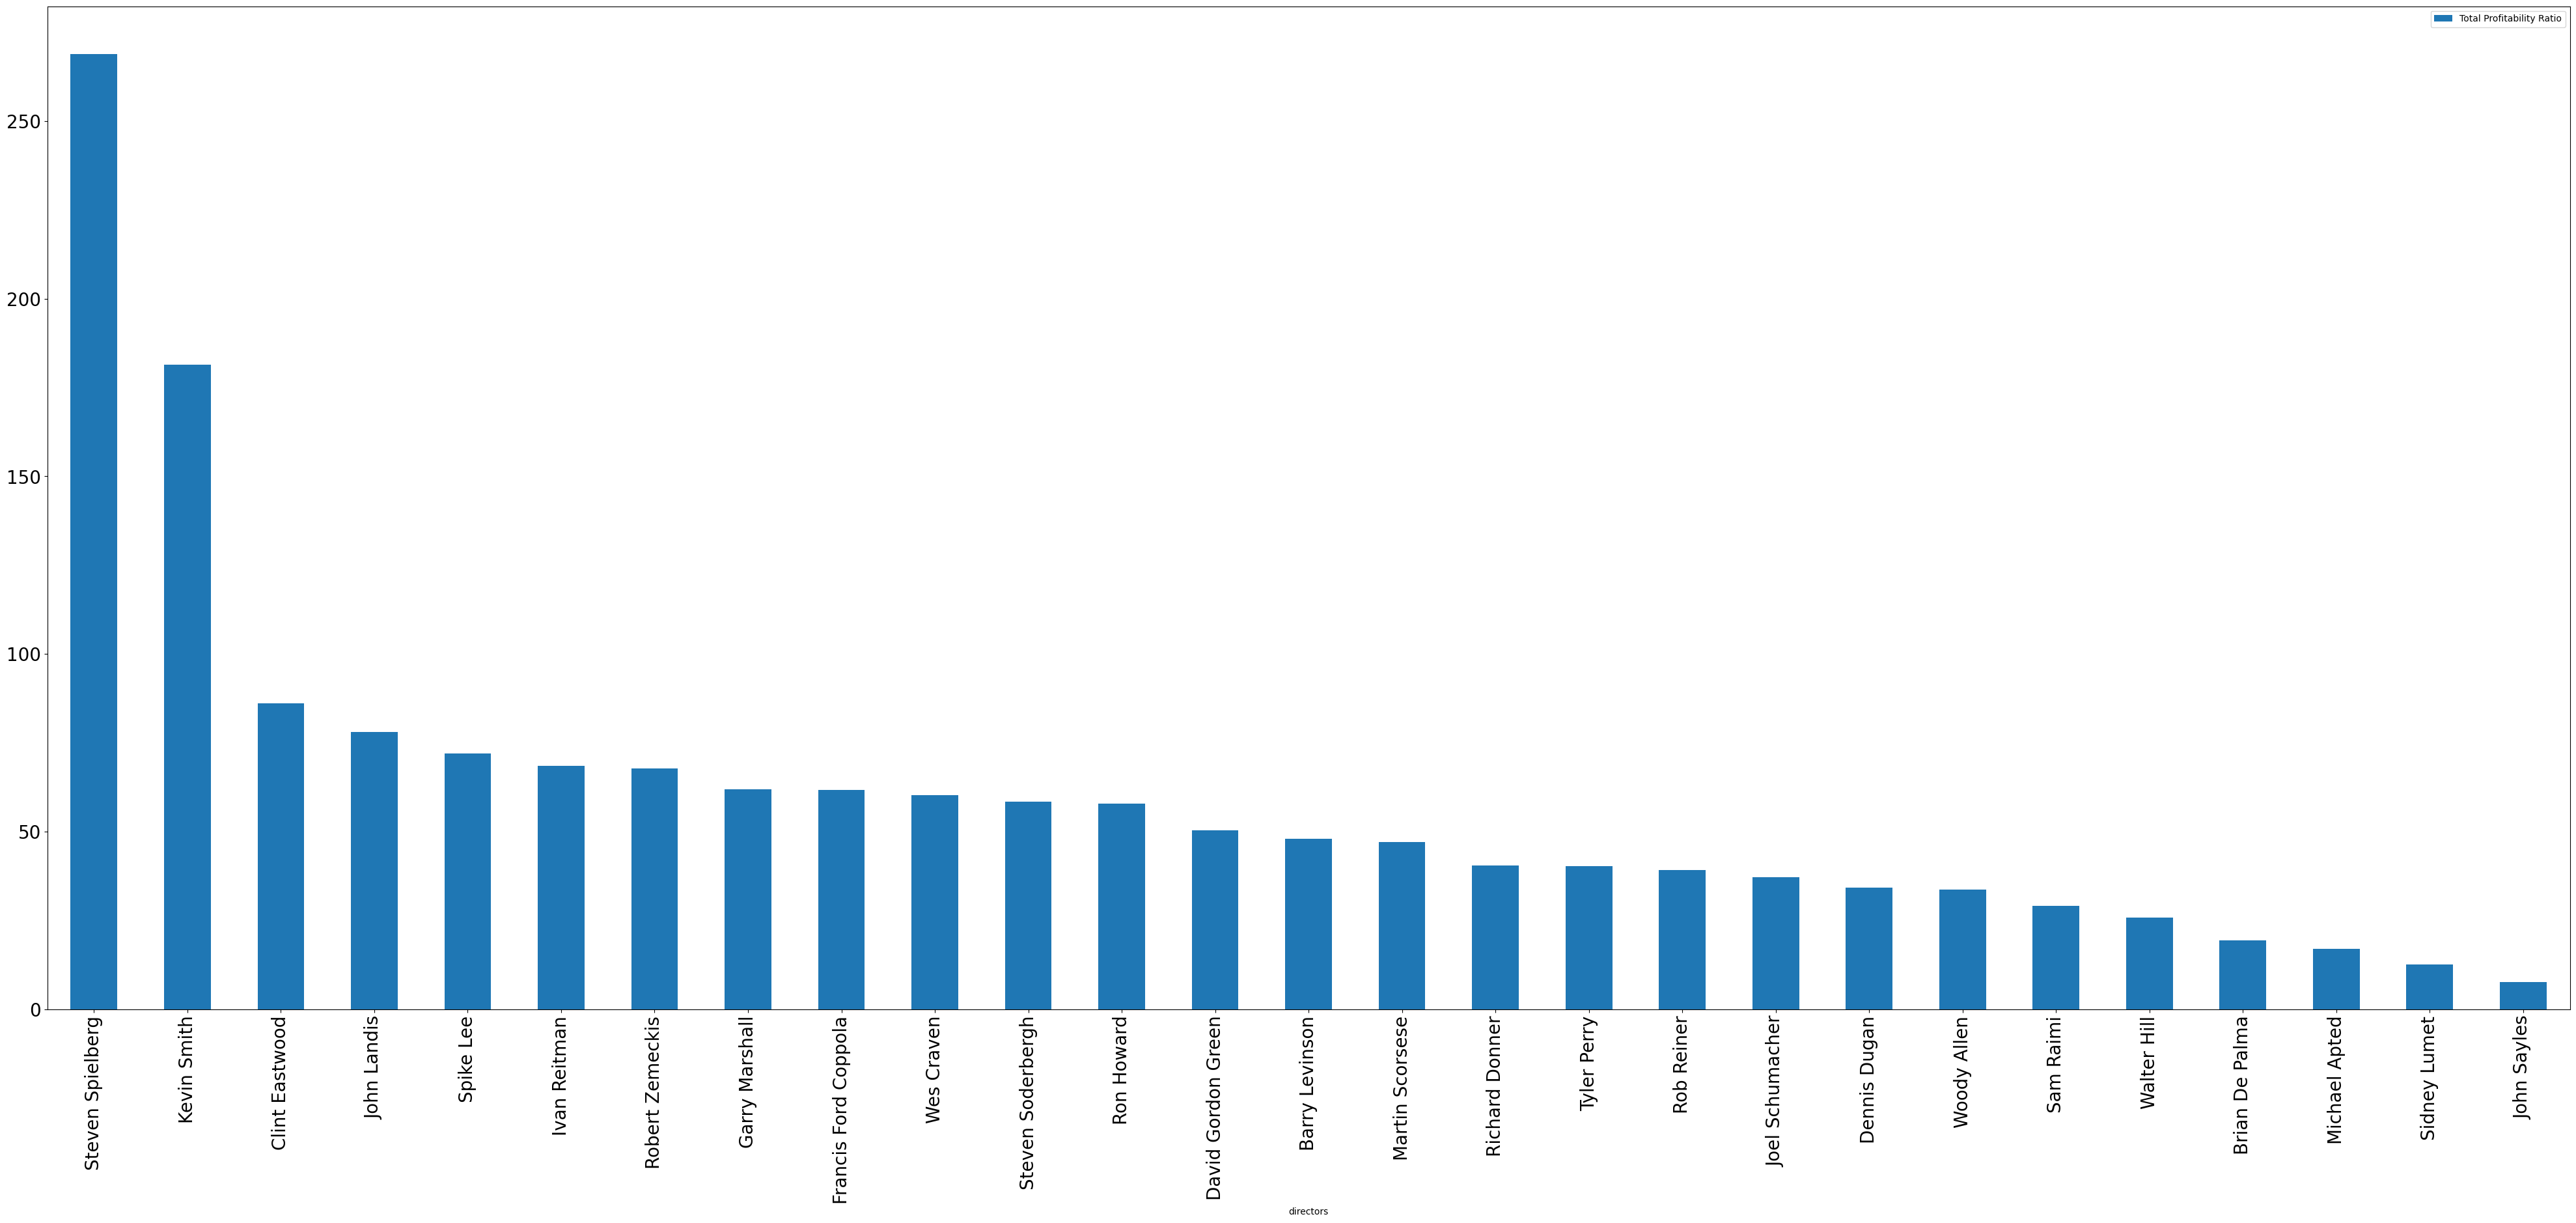

In [20]:
# Plot a bar chart of the total profitability ratio for each director
by_directors_df.iloc[:30].plot(x='directors', y='Total Profitability Ratio', kind='bar', figsize=(50, 20), fontsize=20)

In [21]:
# Calculate the average profitability ratio for each director
by_directors_df['Profitability Ratio'] = by_directors_df['Total Profitability Ratio'] / by_directors_df['count']
by_directors_df.sort_values('Profitability Ratio', ascending=False, inplace=True)
by_directors_df.head()

,directors,count,Total Profitability Ratio,Profitability Ratio
17,Kevin Smith,12,181.442779,15.120232
3,Steven Spielberg,19,268.836534,14.149291
20,John Landis,11,78.098123,7.099829
15,Robert Zemeckis,12,67.710904,5.642575
14,Ivan Reitman,13,68.484882,5.268068


<Axes: xlabel='directors'>

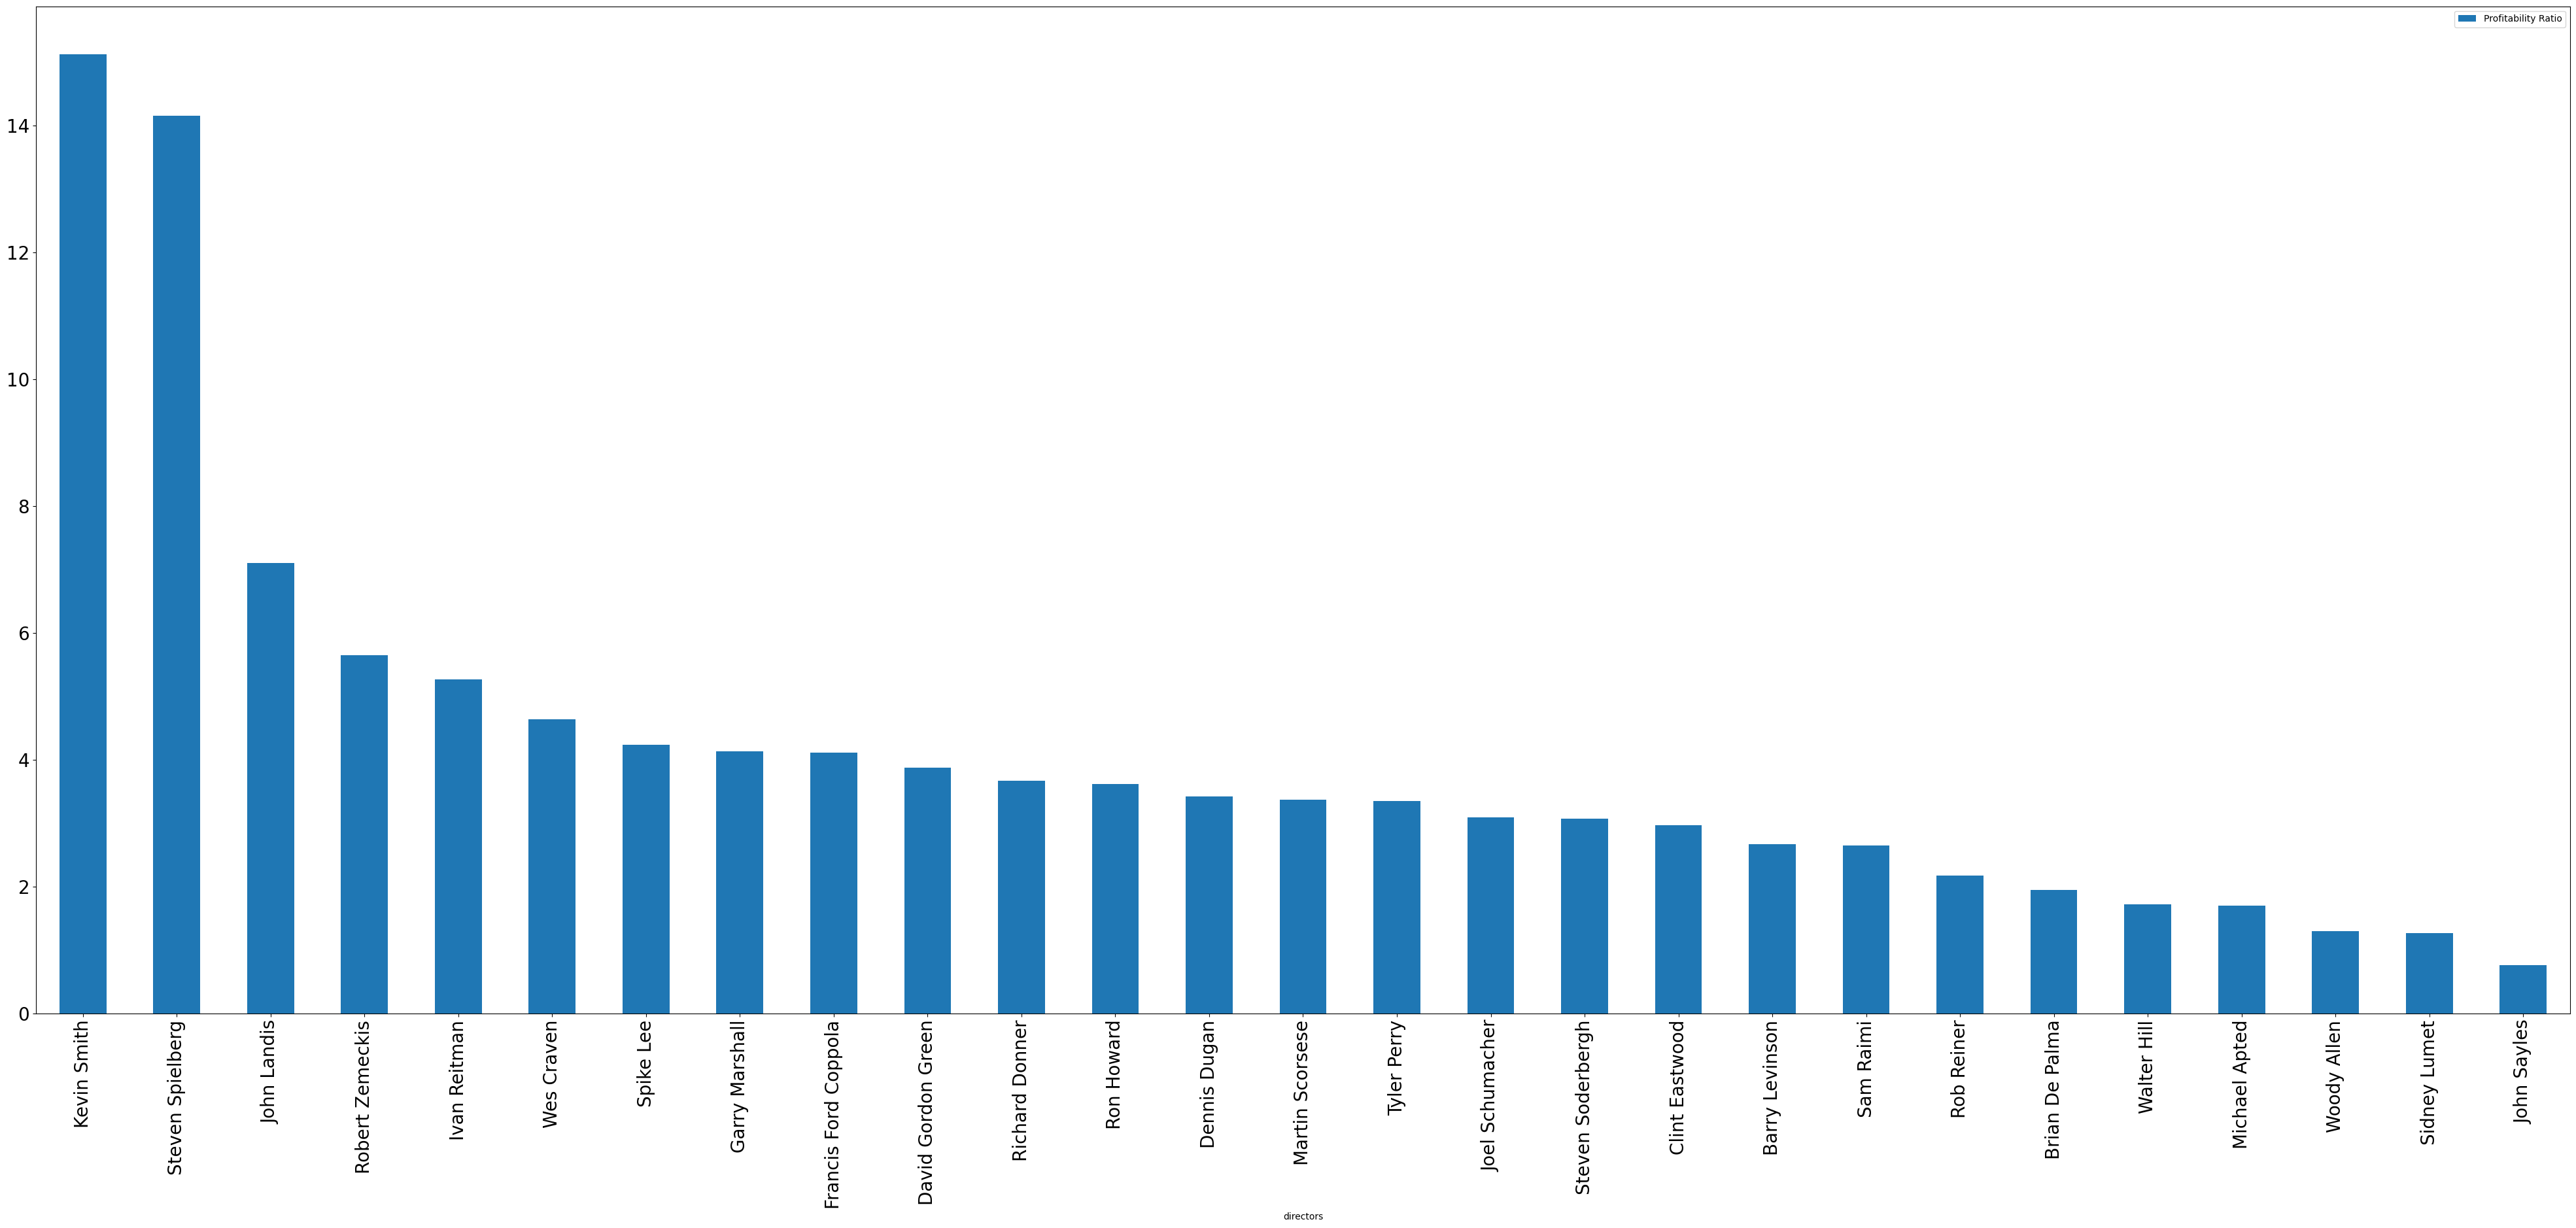

In [22]:
# Plot a bar chart of the profitability ratio for each director
by_directors_df.iloc[:30].plot(x='directors', y='Profitability Ratio', kind='bar', figsize=(50, 20), fontsize=20)

In [23]:
# Plot a bar chart of the profitability ratio for each movie of the top 10 directors
top_directors = by_directors_df.iloc[:10]

directors_expanded_df.loc[directors_expanded_df['directors'] == top_directors.iloc[0]['directors']]

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
1275,Clerks,1994,R,7.7,235K,27000.0,3152360.0,3151130.0,31665.0,Kevin Smith,"[""Brian O'Halloran"", 'Jeff Anderson', 'Marilyn...",0,10,0,116.754074,6.430003e+06
1375,Mallrats,1995,R,7.0,131K,8000000.0,2122561.0,2122561.0,1153838.0,Kevin Smith,"['Shannen Doherty', 'Jeremy London', 'Jason Lee']",0,0,0,0.265320,4.211332e+06
1587,Chasing Amy,1997,R,7.2,146K,250000.0,12021272.0,12021272.0,52446.0,Kevin Smith,"['Ben Affleck', 'Joey Lauren Adams', 'Ethan Su...",0,16,0,48.085088,2.264147e+07
1787,Dogma,1999,R,7.3,233K,10000000.0,31430896.0,30652890.0,8669945.0,Kevin Smith,"['Ben Affleck', 'Matt Damon', 'Linda Fiorentino']",0,0,0,3.143090,5.704558e+07
2018,Jay and Silent Bob Strike Back,2001,R,6.8,163K,22000000.0,33788161.0,30085147.0,11018543.0,Kevin Smith,"['Jason Mewes', 'Kevin Smith', 'Amy Noble']",0,3,0,1.535826,5.770134e+07
2372,Jersey Girl,2004,PG-13,6.2,72K,35000000.0,35492921.0,25268157.0,8300000.0,Kevin Smith,"['Ben Affleck', 'Liv Tyler', 'Raquel Castro']",0,8,0,1.014083,5.680511e+07
2609,Clerks II,2006,R,7.3,142K,5000000.0,26986174.0,24148068.0,10061132.0,Kevin Smith,"[""Brian O'Halloran"", 'Jeff Anderson', 'Rosario...",0,3,0,5.397235,4.047971e+07
2892,Zack and Miri Make a Porno,2008,R,6.5,184K,24000000.0,42784344.0,31457946.0,10065630.0,Kevin Smith,"['Seth Rogen', 'Elizabeth Banks', 'Craig Robin...",0,4,0,1.782681,6.009384e+07
3175,Cop Out,2010,R,5.5,91K,30000000.0,55611001.0,44875481.0,18211126.0,Kevin Smith,"['Bruce Willis', 'Tracy Morgan', 'Juan Carlos ...",0,0,0,1.853700,7.709910e+07
3326,Red State,2011,R,6.1,69K,4000000.0,1874460.0,1104682.0,204230.0,Kevin Smith,"['Michael Parks', 'Melissa Leo', 'John Goodman']",0,8,0,0.468615,2.519644e+06


In [24]:
by_directors_df['directors'].to_list()

summed_column = {}

for director in top_directors['directors']:
    summed_column[director] = directors_expanded_df.loc[directors_expanded_df['directors'] == director]['Profitability Ratio'].sum()
tested_df = pd.DataFrame(summed_column.items(), columns=['directors', 'Total Profitability Ratio'])
tested_df.head(10)

,directors,Total Profitability Ratio
0,Kevin Smith,181.442779
1,Steven Spielberg,268.836534
2,John Landis,78.098123
3,Robert Zemeckis,67.710904
4,Ivan Reitman,68.484882
5,Wes Craven,60.287629
6,Spike Lee,72.025091
7,Garry Marshall,61.971423
8,Francis Ford Coppola,61.663909
9,David Gordon Green,50.319831


In [25]:
by_directors_df['directors'].to_list()

['Kevin Smith',
 'Steven Spielberg',
 'John Landis',
 'Robert Zemeckis',
 'Ivan Reitman',
 'Wes Craven',
 'Spike Lee',
 'Garry Marshall',
 'Francis Ford Coppola',
 'David Gordon Green',
 'Richard Donner',
 'Ron Howard',
 'Dennis Dugan',
 'Martin Scorsese',
 'Tyler Perry',
 'Joel Schumacher',
 'Steven Soderbergh',
 'Clint Eastwood',
 'Barry Levinson',
 'Sam Raimi',
 'Rob Reiner',
 'Brian De Palma',
 'Walter Hill',
 'Michael Apted',
 'Woody Allen',
 'Sidney Lumet',
 'John Sayles']

In [26]:
# Get the total gross for each director
directors_gross_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'grossWorldWideAdjusted')
by_directors_df = by_directors_df.merge(directors_gross_df, on='directors')
by_directors_df['Average grossWorldWideAdjusted'] = by_directors_df['Total grossWorldWideAdjusted'] / by_directors_df['count']
by_directors_df.head()

,directors,count,Total Profitability Ratio,Profitability Ratio,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted
0,Kevin Smith,12,181.442779,15.120232,3.954496e+08,3.295413e+07
1,Steven Spielberg,19,268.836534,14.149291,1.829111e+10,9.626899e+08
2,John Landis,11,78.098123,7.099829,2.790383e+09,2.536712e+08
3,Robert Zemeckis,12,67.710904,5.642575,7.145302e+09,5.954418e+08
4,Ivan Reitman,13,68.484882,5.268068,3.960688e+09,3.046683e+08


In [27]:
# Now look at the number of awards won by each director

# Sum wins (not the number that the director has won, but the number of wins that the movies they directed have had)
directors_wins_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'wins')
by_directors_df = by_directors_df.merge(directors_wins_df, on='directors')
by_directors_df['Average Wins'] = by_directors_df['Total wins'] / by_directors_df['count']

# Sum nominations (not the number that the director has been nominated for, but the number of nominations that the movies they directed have had)
directors_nominations_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'nominations')
by_directors_df = by_directors_df.merge(directors_nominations_df, on='directors')
by_directors_df['Average Nominations'] = by_directors_df['Total nominations'] / by_directors_df['count']

# Sum oscars (not the number that the director has won, but the number of oscars that the movies they directed have won)
directors_oscars_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'oscars')
by_directors_df = by_directors_df.merge(directors_oscars_df, on='directors')
by_directors_df['Average Oscars'] = by_directors_df['Total oscars'] / by_directors_df['count']

# Average ratings
directors_ratings_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'Rating')
by_directors_df = by_directors_df.merge(directors_ratings_df, on='directors')
by_directors_df['Total Rating'] = by_directors_df['Total Rating'] / by_directors_df['count']
by_directors_df.rename(columns = {'Total Rating' : 'Average Rating'}, inplace=True)

by_directors_df.head()


,directors,count,Total Profitability Ratio,Profitability Ratio,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating
0,Kevin Smith,12,181.442779,15.120232,3.954496e+08,3.295413e+07,0,0.0,52,4.333333,0,0.000000,6.616667
1,Steven Spielberg,19,268.836534,14.149291,1.829111e+10,9.626899e+08,0,0.0,607,31.947368,35,1.842105,7.468421
2,John Landis,11,78.098123,7.099829,2.790383e+09,2.536712e+08,0,0.0,21,1.909091,3,0.272727,6.572727
3,Robert Zemeckis,12,67.710904,5.642575,7.145302e+09,5.954418e+08,0,0.0,256,21.333333,4,0.333333,7.425000
4,Ivan Reitman,13,68.484882,5.268068,3.960688e+09,3.046683e+08,0,0.0,20,1.538462,4,0.307692,6.192308


In [28]:
# Sort the dataframe by the average gross worldwide adjusted
by_directors_df.sort_values('Average grossWorldWideAdjusted', ascending=False, inplace=True)
by_directors_df.head(10)

,directors,count,Total Profitability Ratio,Profitability Ratio,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating
1,Steven Spielberg,19,268.836534,14.149291,1.829111e+10,9.626899e+08,0,0.0,607,31.947368,35,1.842105,7.468421
3,Robert Zemeckis,12,67.710904,5.642575,7.145302e+09,5.954418e+08,0,0.0,256,21.333333,4,0.333333,7.425000
19,Sam Raimi,11,29.138676,2.648971,5.887371e+09,5.352156e+08,0,0.0,249,22.636364,3,0.272727,6.790909
4,Ivan Reitman,13,68.484882,5.268068,3.960688e+09,3.046683e+08,0,0.0,20,1.538462,4,0.307692,6.192308
10,Richard Donner,11,40.384959,3.671360,3.295077e+09,2.995525e+08,0,0.0,37,3.363636,4,0.363636,6.800000
11,Ron Howard,16,57.892587,3.618287,4.408813e+09,2.755508e+08,0,0.0,272,17.000000,13,0.812500,6.887500
2,John Landis,11,78.098123,7.099829,2.790383e+09,2.536712e+08,0,0.0,21,1.909091,3,0.272727,6.572727
12,Dennis Dugan,10,34.225939,3.422594,2.375223e+09,2.375223e+08,0,0.0,52,5.200000,0,0.000000,5.930000
8,Francis Ford Coppola,15,61.663909,4.110927,3.404116e+09,2.269411e+08,0,0.0,169,11.266667,19,1.266667,6.953333
7,Garry Marshall,15,61.971423,4.131428,2.838454e+09,1.892302e+08,0,0.0,60,4.000000,2,0.133333,6.020000


In [29]:
# Display the top 10 directors by average gross worldwide adjusted
by_directors_df[['directors', 'Average grossWorldWideAdjusted']].head(10)

,directors,Average grossWorldWideAdjusted
1,Steven Spielberg,9.626899e+08
3,Robert Zemeckis,5.954418e+08
19,Sam Raimi,5.352156e+08
4,Ivan Reitman,3.046683e+08
10,Richard Donner,2.995525e+08
11,Ron Howard,2.755508e+08
2,John Landis,2.536712e+08
12,Dennis Dugan,2.375223e+08
8,Francis Ford Coppola,2.269411e+08
7,Garry Marshall,1.892302e+08


In [30]:
by_directors_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1 to 26
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   directors                       27 non-null     object 
 1   count                           27 non-null     int64  
 2   Total Profitability Ratio       27 non-null     float64
 3   Profitability Ratio             27 non-null     float64
 4   Total grossWorldWideAdjusted    27 non-null     float64
 5   Average grossWorldWideAdjusted  27 non-null     float64
 6   Total wins                      27 non-null     int64  
 7   Average Wins                    27 non-null     float64
 8   Total nominations               27 non-null     int64  
 9   Average Nominations             27 non-null     float64
 10  Total oscars                    27 non-null     int64  
 11  Average Oscars                  27 non-null     float64
 12  Average Rating                  27 non-null

<Axes: xlabel='directors'>

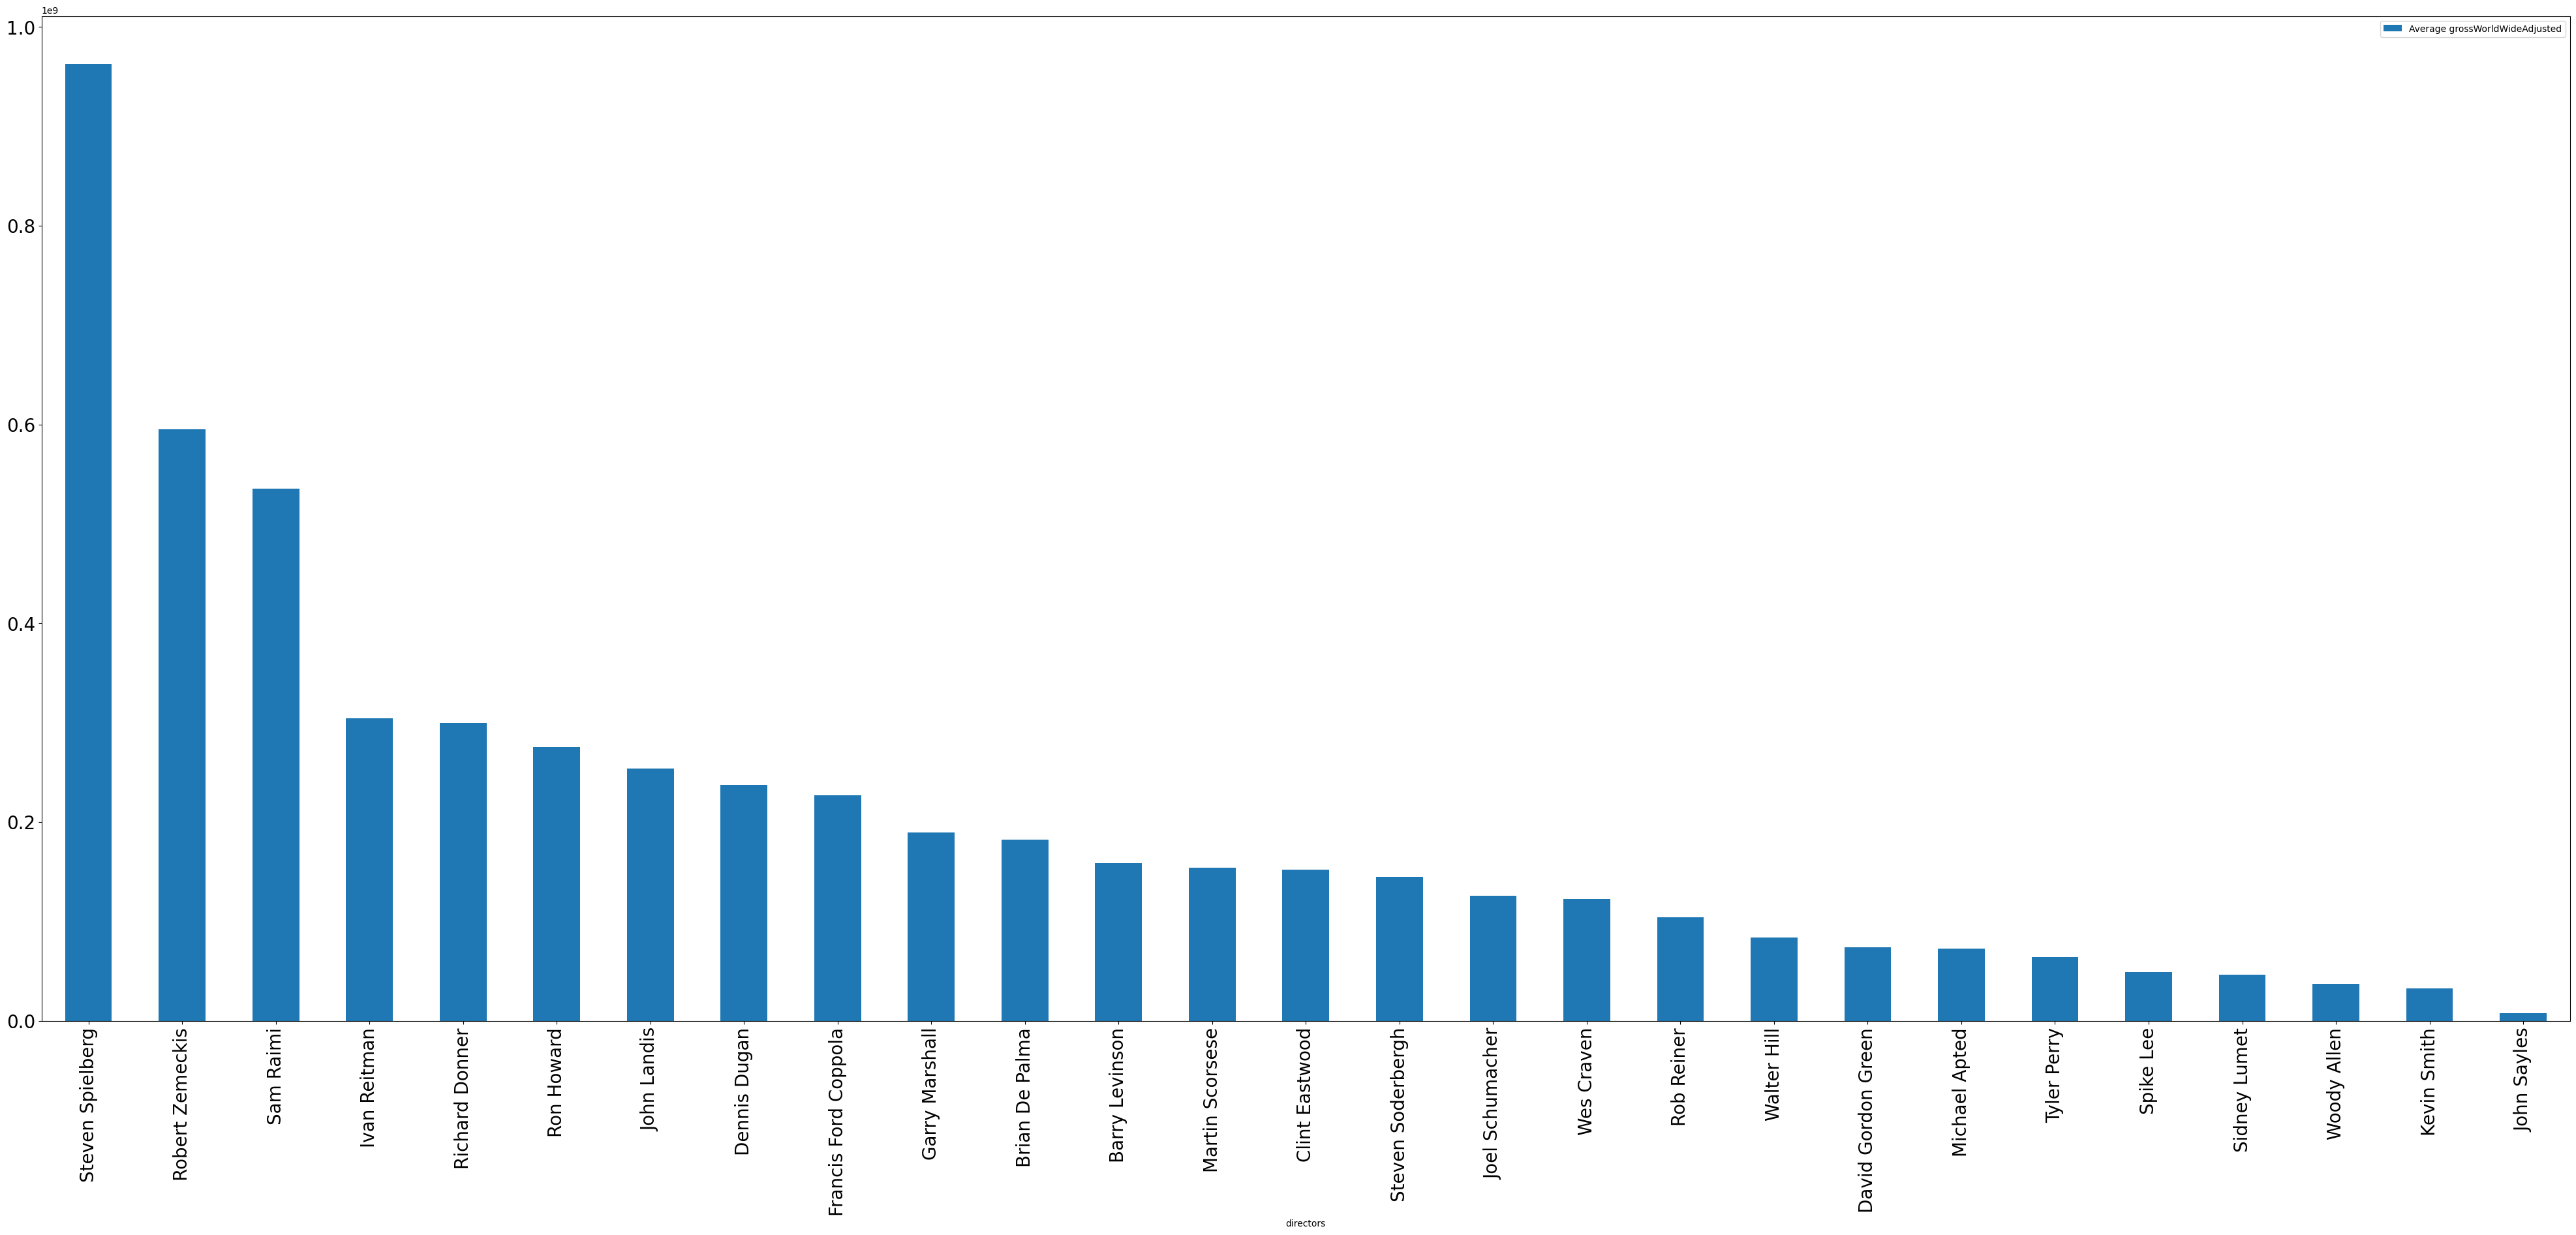

In [31]:
# Plot a bar chart of the average gross worldwide adjusted for each director
by_directors_df.iloc[:30].plot(x='directors', y='Average grossWorldWideAdjusted', kind='bar', figsize=(50, 20), fontsize=20)

### Observations
* All of the directors are above the upper quartile range for overall movies
* Some at the top of the sorted list were much higher than others.

array([[<Axes: title={'center': 'Average grossWorldWideAdjusted'}>]],
      dtype=object)

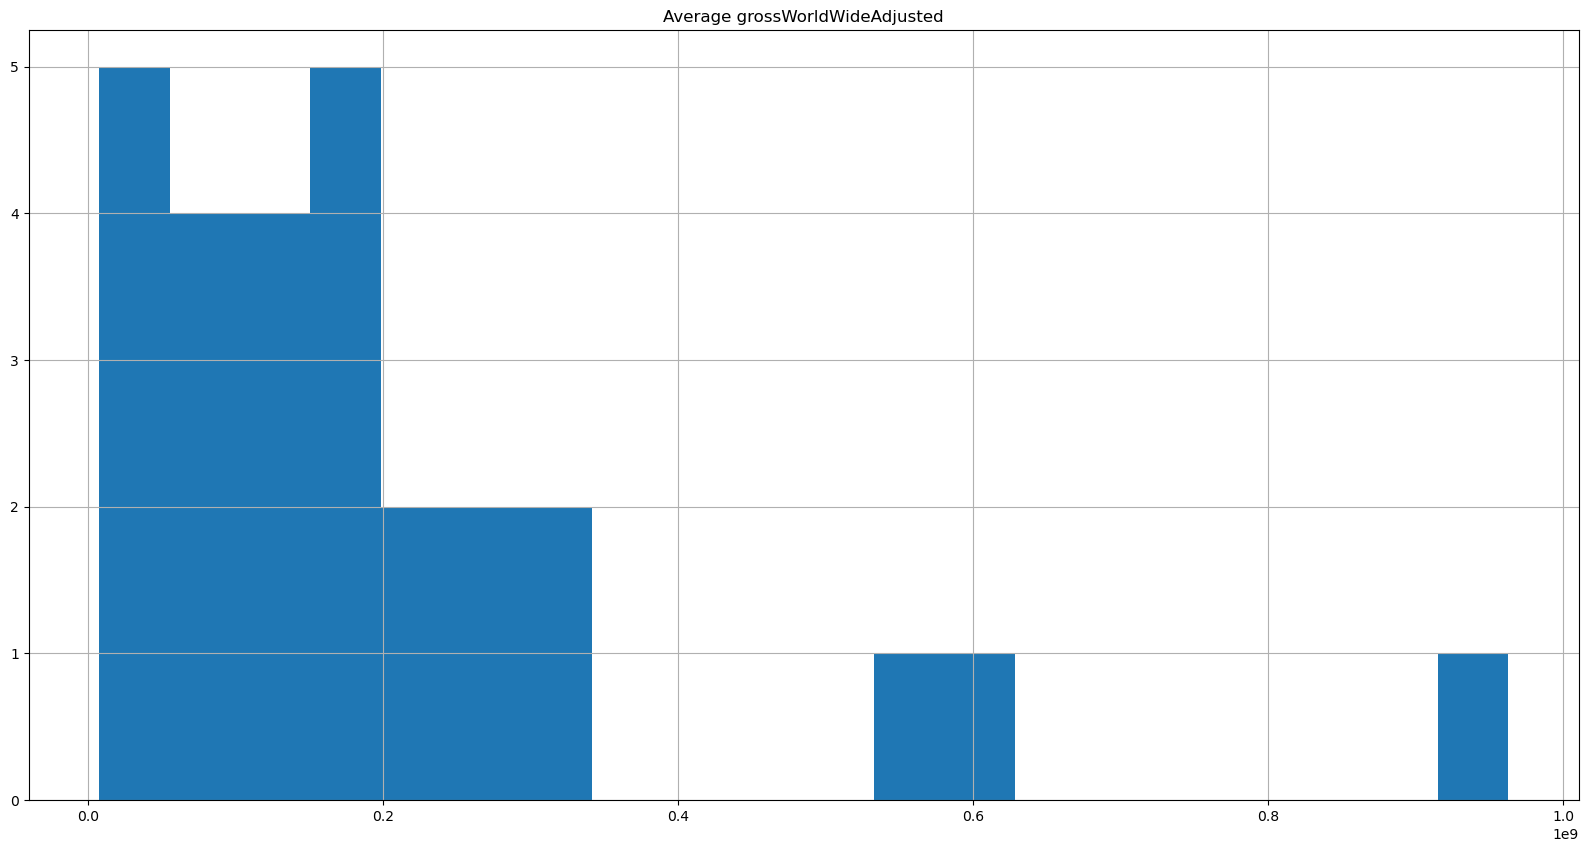

In [32]:
# Plot a histogram of the average gross worldwide adjusted for each director
by_directors_df.hist(column='Average grossWorldWideAdjusted', bins=20, figsize=(20, 10))

In [33]:
# Look up all the movies of a given director
highest_grossing_director_movies_df = directors_expanded_df.loc[directors_expanded_df['directors'] == 'Steven Spielberg']
highest_grossing_director_movies_df.sort_values('Year', ascending=False, inplace=True)
highest_grossing_director_movies_df.reset_index(drop=True, inplace=True)
highest_grossing_director_movies_df

C:\Users\hunte\AppData\Local\Temp\ipykernel_2512\627334357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_grossing_director_movies_df.sort_values('Year', ascending=False, inplace=True)


,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
0,Indiana Jones and the Kingdom of the Crystal ...,2008,PG-13,6.2,499K,185000000.0,7.866360e+08,317101119.0,100137835.0,Steven Spielberg,"['Harrison Ford', 'Cate Blanchett', 'Shia LaBe...",0,42,1,4.252087,1.104890e+09
1,War of the Worlds,2005,PG-13,6.5,485K,132000000.0,6.038735e+08,234280354.0,64878725.0,Steven Spielberg,"['Tom Cruise', 'Dakota Fanning', 'Tim Robbins']",0,49,3,4.574799,9.350066e+08
2,The Terminal,2004,PG-13,7.4,508K,60000000.0,2.191001e+08,77872883.0,19053199.0,Steven Spielberg,"['Tom Hanks', 'Catherine Zeta-Jones', 'Chi McB...",0,8,0,3.651668,3.506616e+08
3,Minority Report,2002,PG-13,7.6,596K,102000000.0,3.583729e+08,132072926.0,35677125.0,Steven Spielberg,"['Tom Cruise', 'Colin Farrell', 'Samantha Mort...",0,91,1,3.513460,6.023949e+08
4,Saving Private Ryan,1998,R,8.6,1.5M,70000000.0,4.823524e+08,217049603.0,30576104.0,Steven Spielberg,"['Tom Hanks', 'Matt Damon', 'Tom Sizemore']",0,75,0,6.890748,8.946464e+08
5,Amistad,1997,R,7.3,84K,36000000.0,4.422944e+07,44229441.0,4573523.0,Steven Spielberg,"['Djimon Hounsou', 'Matthew McConaughey', 'Ant...",0,44,4,1.228596,8.330395e+07
6,The Lost World: Jurassic Park,1997,PG-13,6.6,453K,73000000.0,6.186390e+08,229086679.0,72132785.0,Steven Spielberg,"['Jeff Goldblum', 'Julianne Moore', 'Pete Post...",0,28,1,8.474507,1.165176e+09
7,Jurassic Park,1993,PG-13,8.2,1.1M,63000000.0,1.104380e+09,407185075.0,47026828.0,Steven Spielberg,"['Sam Neill', 'Laura Dern', 'Jeff Goldblum']",0,27,0,17.529840,2.311121e+09
8,Schindler's List,1993,R,9.0,1.5M,22000000.0,3.221612e+08,96898818.0,656636.0,Steven Spielberg,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley']",0,49,0,14.643693,6.741824e+08
9,Hook,1991,PG,6.8,279K,70000000.0,3.008548e+08,119654823.0,13522535.0,Steven Spielberg,"['Dustin Hoffman', 'Robin Williams', 'Julia Ro...",0,24,5,4.297926,6.680100e+08


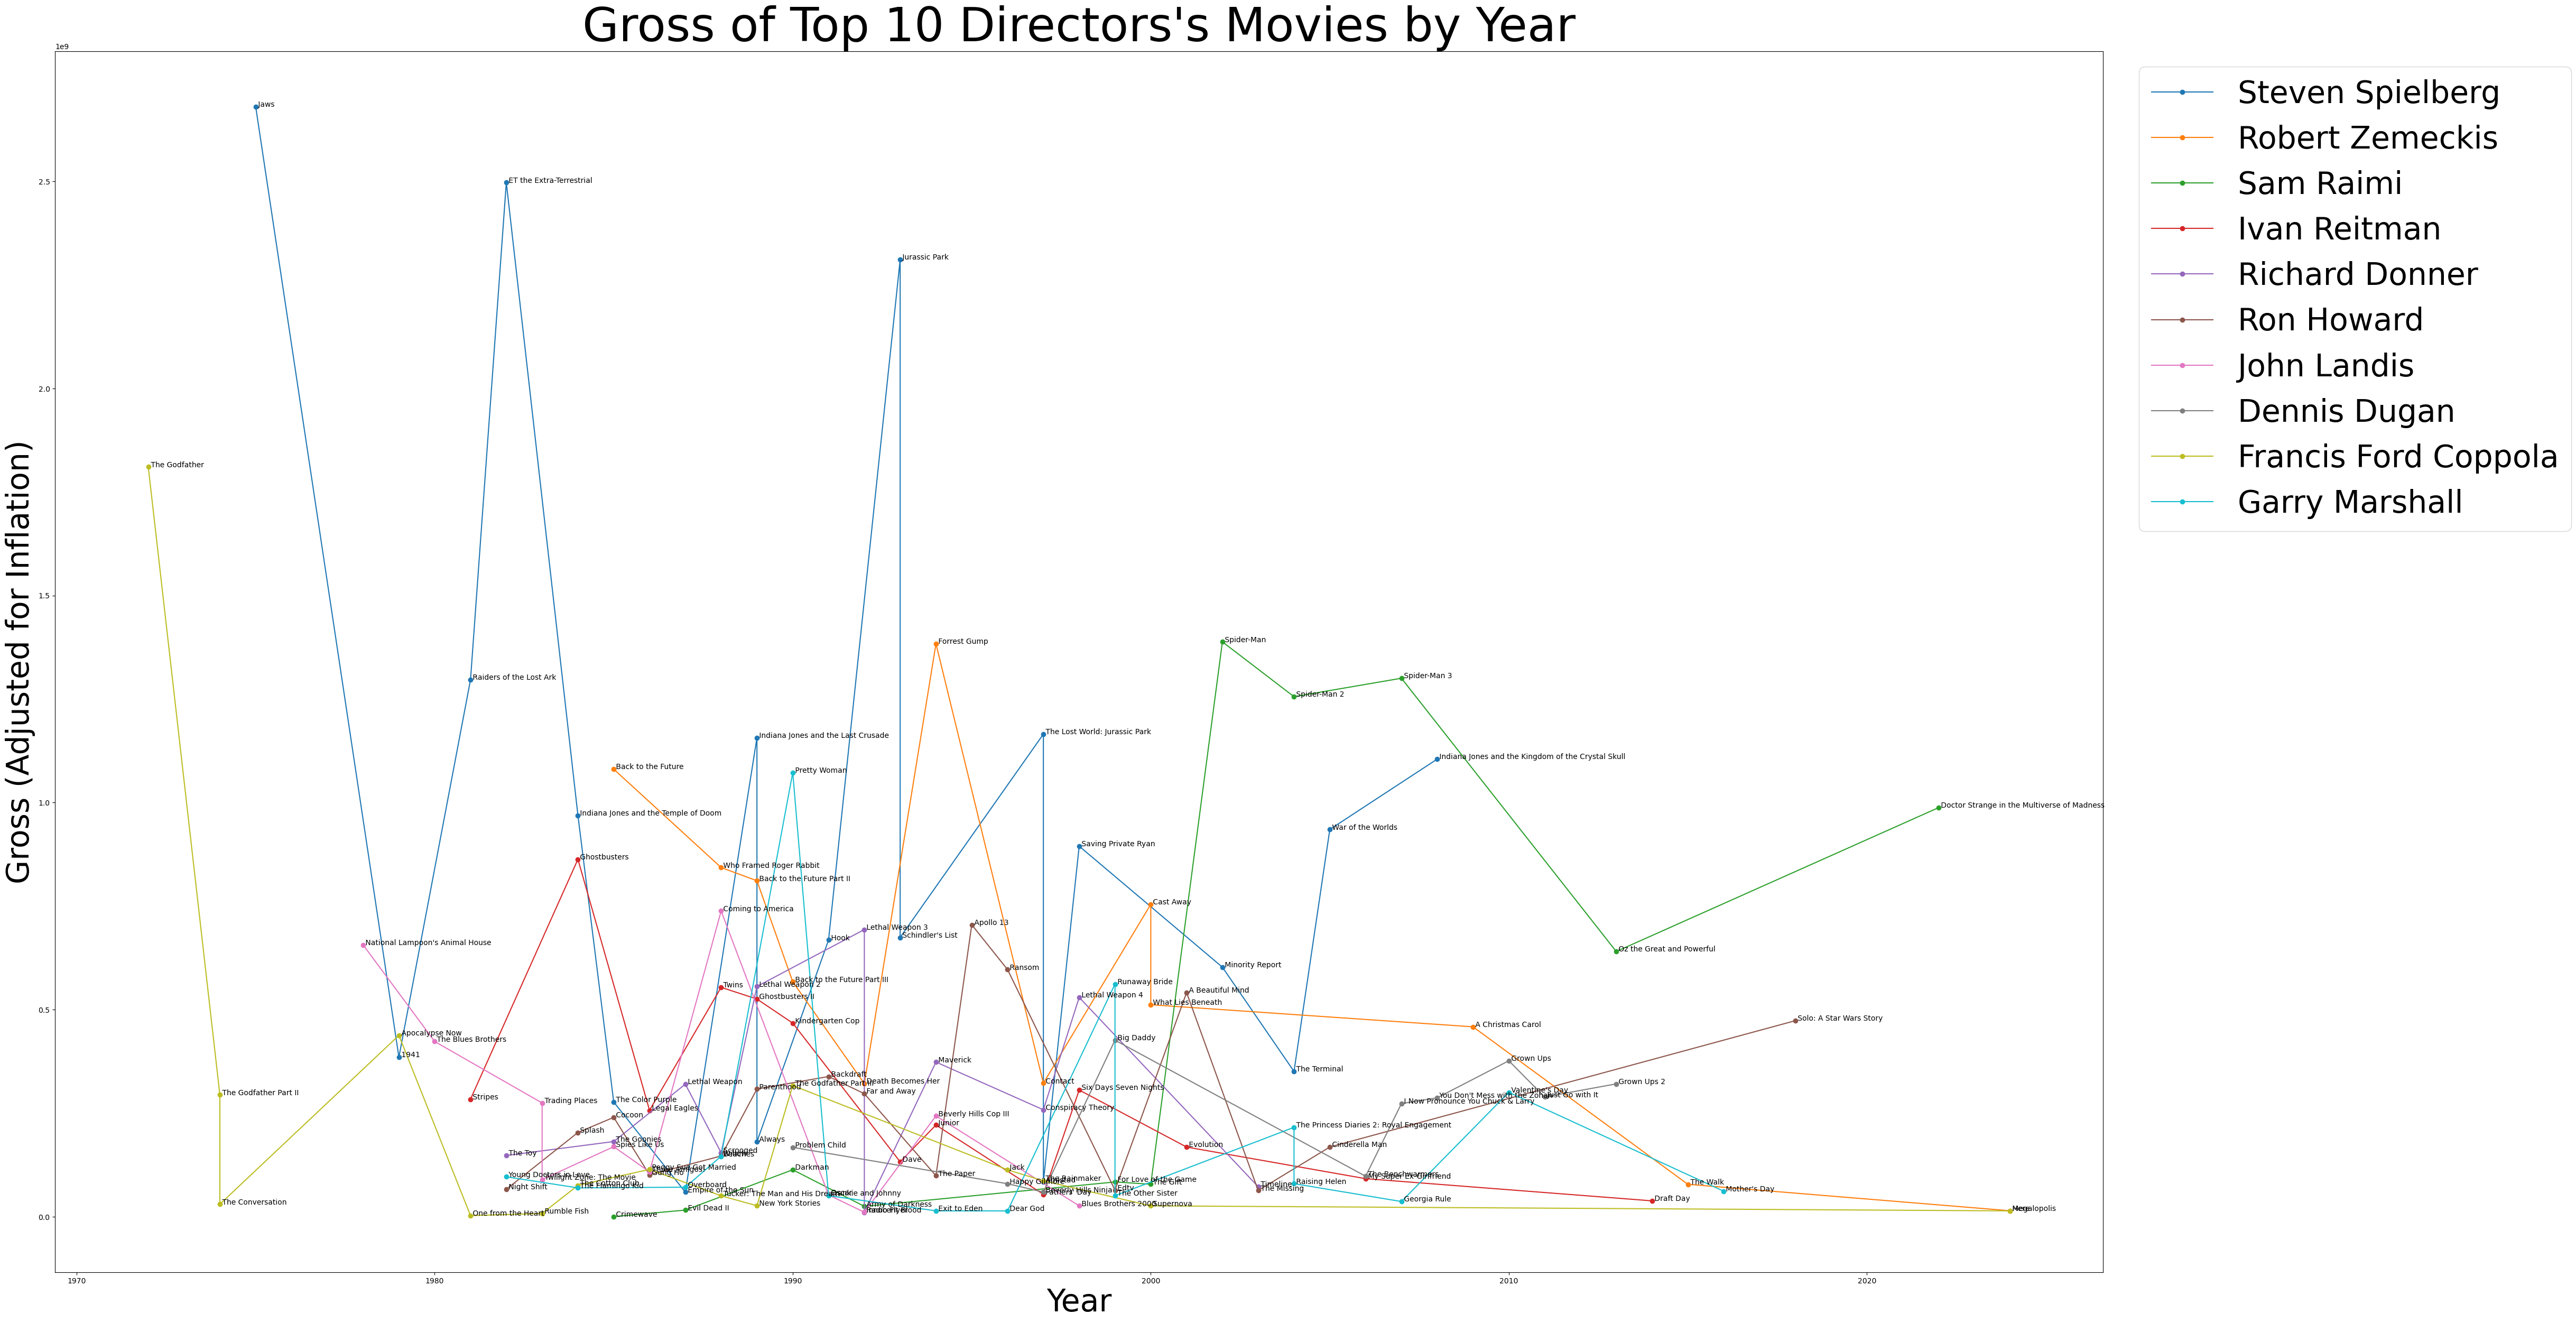

In [34]:
# Plot the gross of the movies of the highest grossing director by year
by_directors_df.sort_values('Average grossWorldWideAdjusted', ascending=False, inplace=True)
plt.figure(figsize=(50, 30))
for director in by_directors_df['directors'].iloc[:10].unique():
    current_director = directors_expanded_df.loc[directors_expanded_df['directors'] == director]
    plt.plot(current_director['Year'], current_director['grossWorldWideAdjusted'], 'o-')
    # Label each point on the graph by the movie name
    for i in range(len(current_director)):
        plt.text(current_director['Year'].iloc[i], current_director['grossWorldWideAdjusted'].iloc[i], current_director['Title'].iloc[i])
plt.xlabel('Year', fontsize=42)
plt.ylabel('Gross (Adjusted for Inflation)', fontsize=42)
plt.title("Gross of Top 10 Directors's Movies by Year", fontsize=64)
plt.legend(by_directors_df['directors'].iloc[:10].unique(), bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize=42)
plt.size=(100, 50)

plt.show()

### Observations
* Directors often trend at a given time. Steven Spielberg movies gross worldwide earnings decrease over time.
* There are a lot of peaks that raise the directors average but shows that they do have movies that make a lot less. High success isn't guaranteed by director, but even their lower performing movies for these top 10 directors are higher than the upper quartile range for overall gross world wide earnings.

### Conclusion
#### Movies from a particular director aren't guaranteed to be successful, but they are far more likely to be succesful with some of the top directors. Directors rated by profitablity ratio do differ from hihghest grossing, showing that directors working with a smaller budget can multiply that in earnings more than directors that have higher budgets.

### Future work
#### Further analysis could account better for the success of a director during a given time rather than average overall time.


# Actors

In [35]:
# Expand the columns with lists: 'stars' into separate rows
actors_expanded_df = expand_lists(df, ['stars'])

In [36]:
# Count the number of movies by each actor
by_actors_df = pd.DataFrame(actors_expanded_df.value_counts('stars'))
by_actors_df.reset_index(inplace=True)
by_actors_df

,stars,count
0,Robert De Niro,40
1,Nicolas Cage,36
2,Bruce Willis,35
3,Tom Hanks,34
4,Eddie Murphy,32
...,...,...
5203,Janet Suzman,1
5204,Janice Karman,1
5205,Janine Turner,1
5206,Janis Ward,1


In [37]:
# Drop the actors with fewer than 10 movies
by_actors_df = by_actors_df[by_actors_df['count'] >= 10]
by_actors_df

,stars,count
0,Robert De Niro,40
1,Nicolas Cage,36
2,Bruce Willis,35
3,Tom Hanks,34
4,Eddie Murphy,32
...,...,...
224,Kate Hudson,10
225,Robin Wright,10
226,Laura Dern,10
227,Emma Stone,10


In [38]:
# Get the sum of the profitability ratio for each actor
actors_profitability_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'Profitability Ratio')
directors_profitability_df.head()
actors_profitability_df.head()

,stars,Total Profitability Ratio
0,Robert De Niro,97.825955
1,Nicolas Cage,117.588261
2,Bruce Willis,85.491823
3,Tom Hanks,154.882105
4,Eddie Murphy,125.916734


In [39]:
# Add the profitability ratio for each director to the dataframe
by_actors_df = by_actors_df.merge(actors_profitability_df, on='stars')
by_actors_df.head()

,stars,count,Total Profitability Ratio
0,Robert De Niro,40,97.825955
1,Nicolas Cage,36,117.588261
2,Bruce Willis,35,85.491823
3,Tom Hanks,34,154.882105
4,Eddie Murphy,32,125.916734


In [40]:
# Sort the dataframe by the profitability ratio
by_actors_df.sort_values('Total Profitability Ratio', ascending=False, inplace=True)
by_actors_df.head()

,stars,count,Total Profitability Ratio
56,Drew Barrymore,17,348.189677
53,John Travolta,18,237.978631
13,Harrison Ford,26,217.697403
3,Tom Hanks,34,154.882105
36,Ben Affleck,21,139.671802


<Axes: xlabel='stars'>

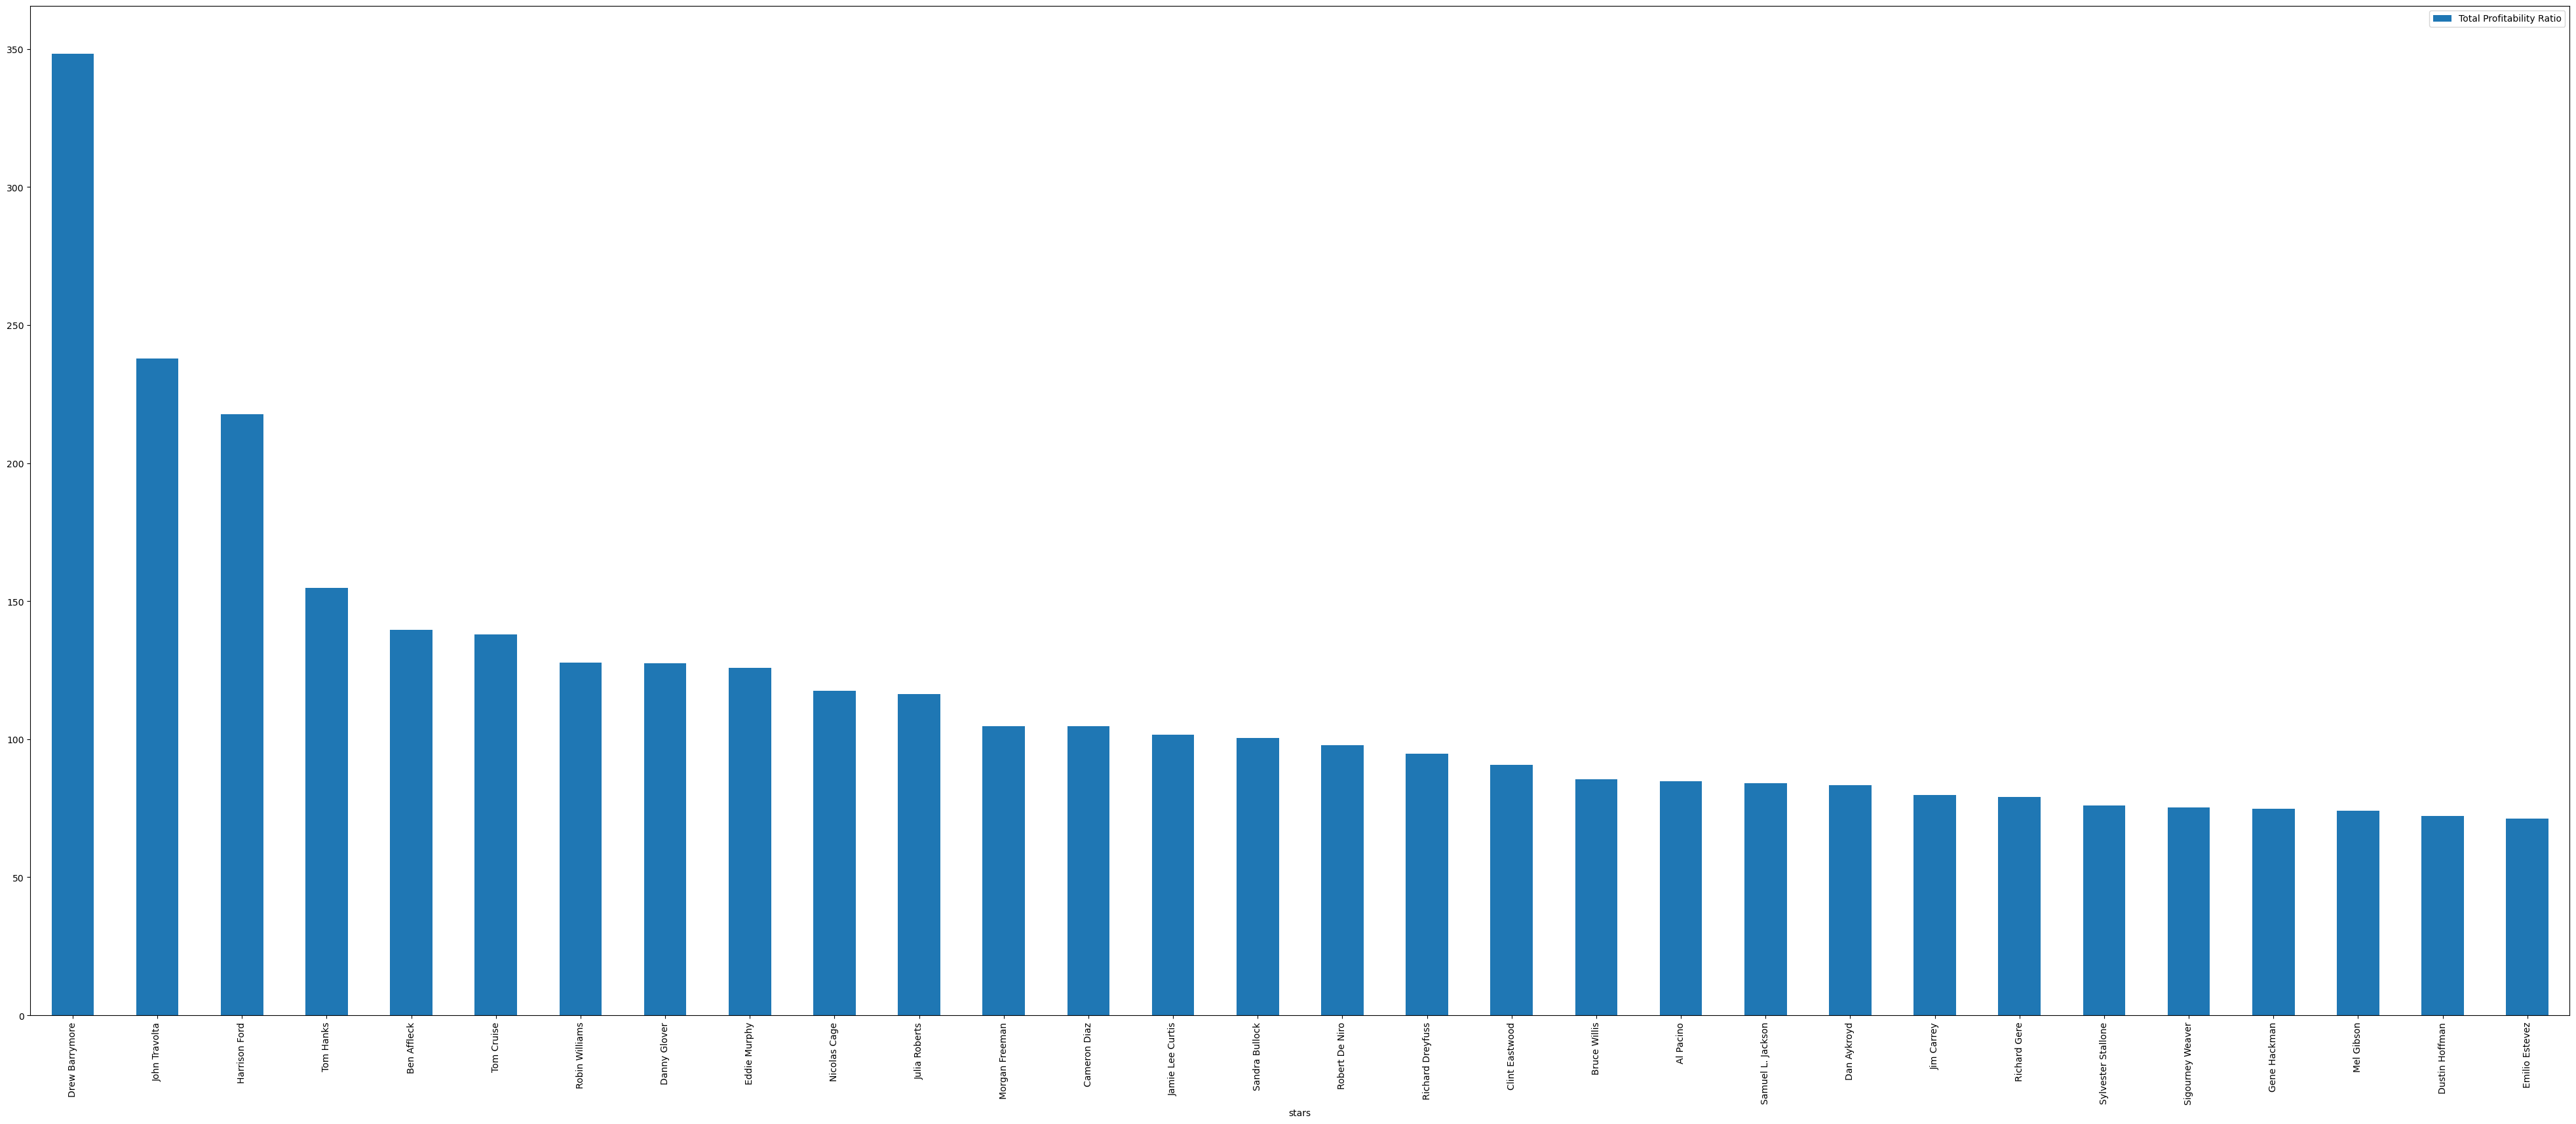

In [41]:
# Plot a bar chart of the total profitability ratio for each director, excluding jet li since he is bt far the highest
by_actors_df.iloc[:30].plot(x='stars', y='Total Profitability Ratio', kind='bar', figsize=(50, 20))

In [42]:
by_actors_df['Profitability Ratio'] = by_actors_df['Total Profitability Ratio'] / by_actors_df['count']
by_actors_df.sort_values('Profitability Ratio', ascending=False, inplace=True)
by_actors_df.head()

,stars,count,Total Profitability Ratio,Profitability Ratio
56,Drew Barrymore,17,348.189677,20.481746
53,John Travolta,18,237.978631,13.221035
13,Harrison Ford,26,217.697403,8.372977
72,Danny Glover,16,127.477306,7.967332
103,Jamie Lee Curtis,14,101.595119,7.256794


<Axes: xlabel='stars'>

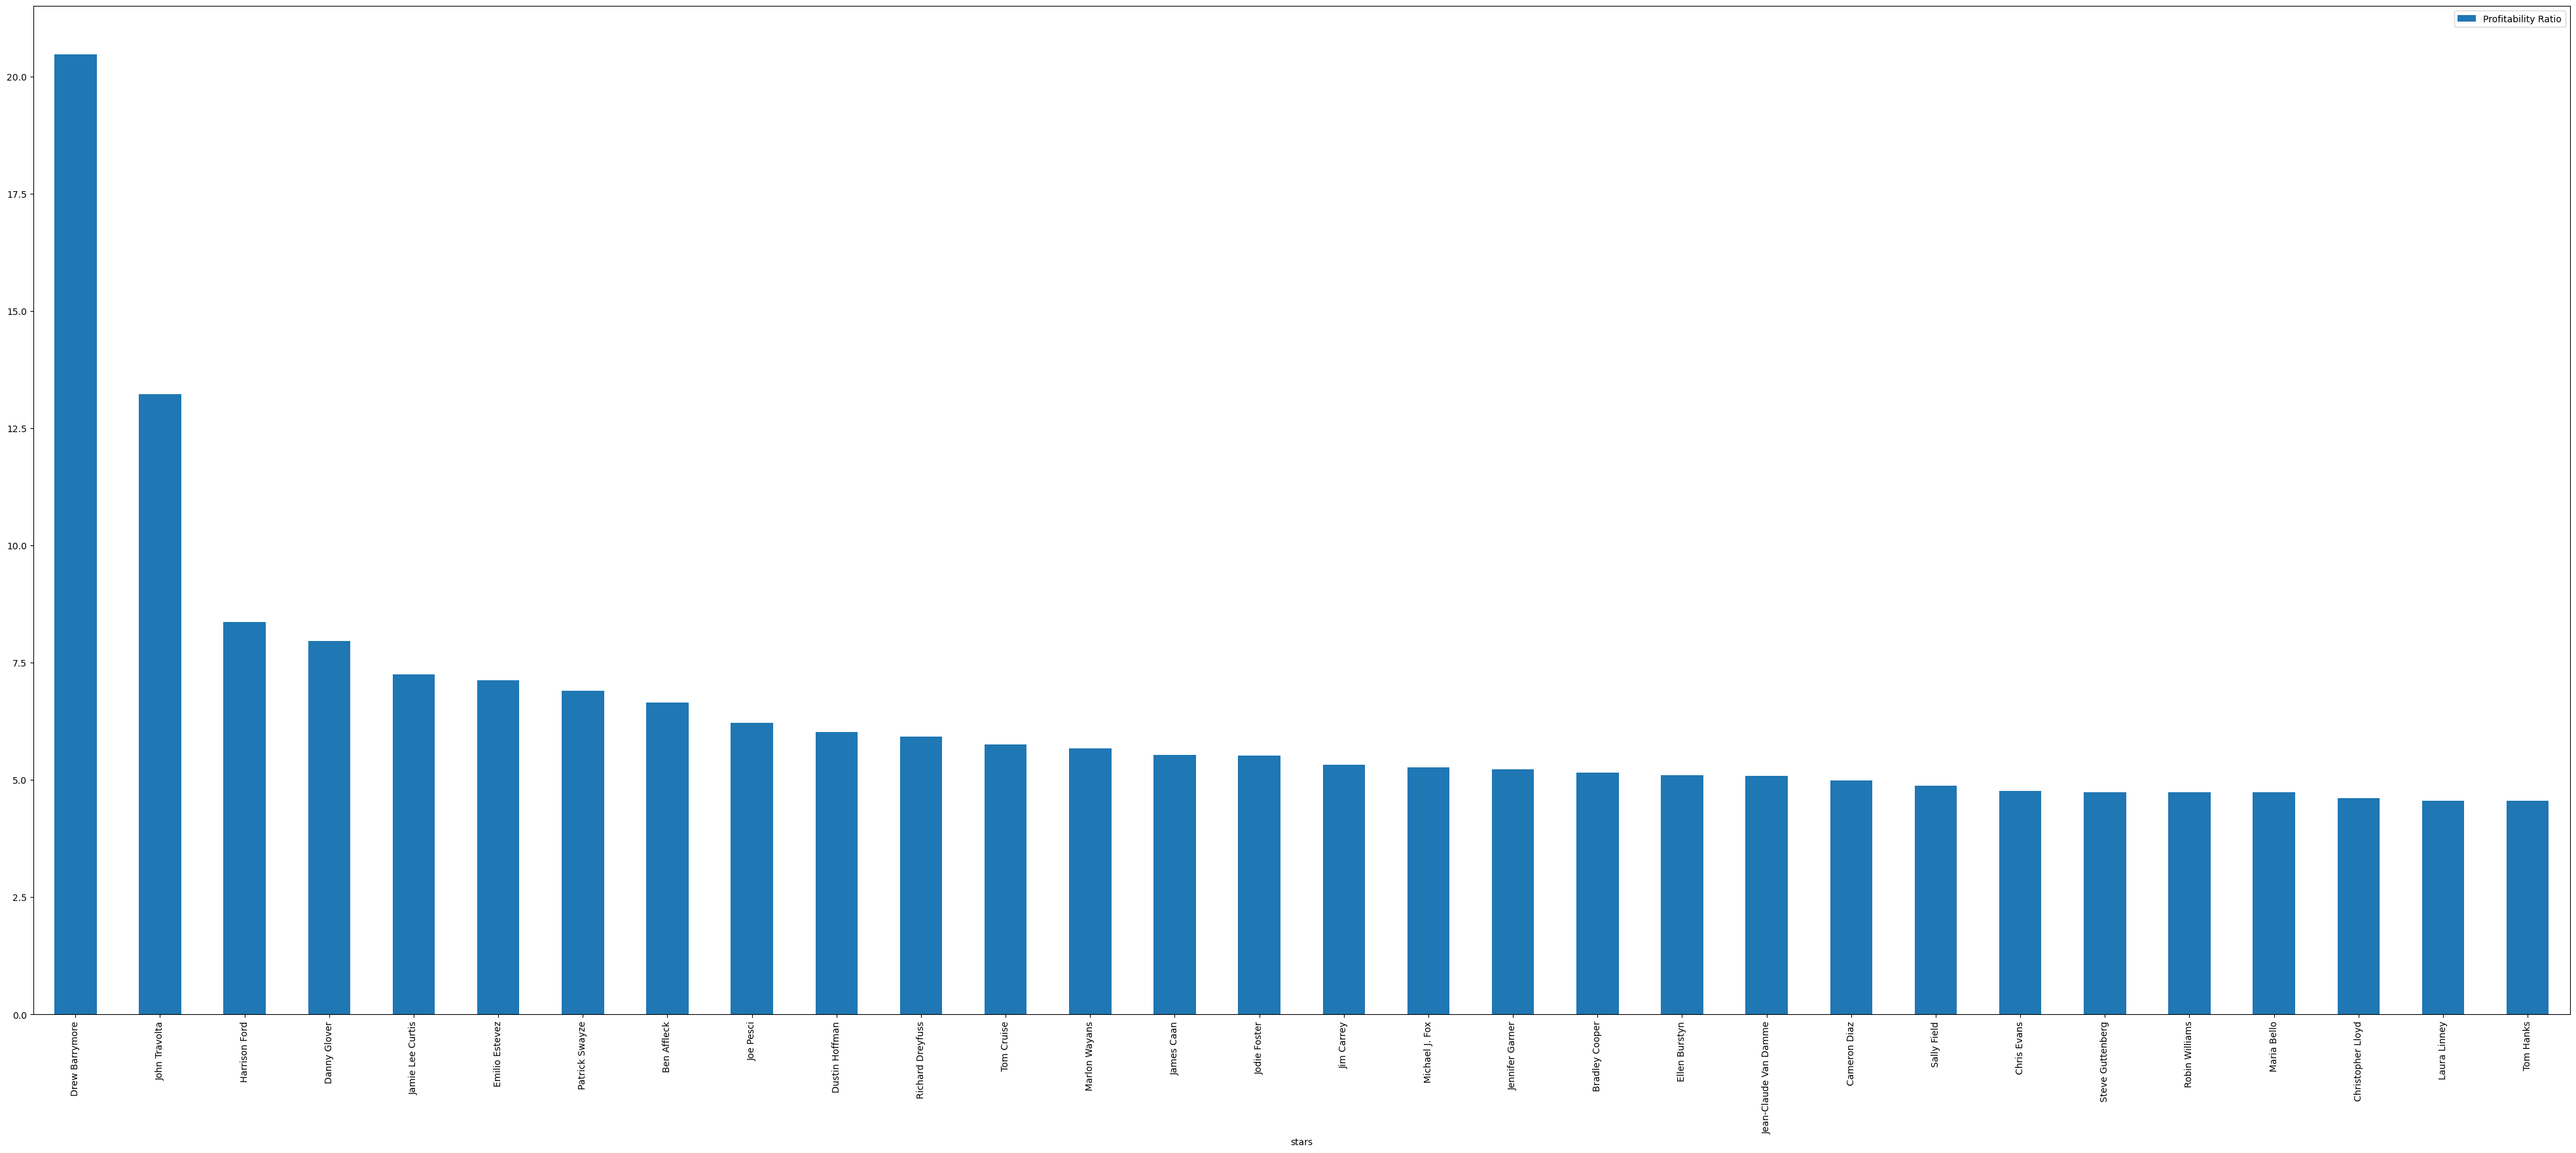

In [43]:
# Plot a bar chart of the profitability ratio for each director, excluding jet li since he is by far the highest
by_actors_df.iloc[:30].plot(x='stars', y='Profitability Ratio', kind='bar', figsize=(50, 20))

### Observations (similar to directors)
* All of the actors are above the upper quartile range for overall movies
* Some at the top of the sorted list were much higher than others.

In [44]:
# Now look at the number of awards won by each actor

# Sum wins (not the number that the actor has won, but the number of wins that the movies they acted in have had)
actors_wins_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'wins')
by_actors_df = by_actors_df.merge(actors_wins_df, on='stars')
by_actors_df['Average Wins'] = by_actors_df['Total wins'] / by_actors_df['count']

# Sum nominations (not the number that the actor has been nominated for, but the number of nominations that the movies they acted in have had)
actors_nominations_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'nominations')
by_actors_df = by_actors_df.merge(actors_nominations_df, on='stars')
by_actors_df['Average Nominations'] = by_actors_df['Total nominations'] / by_actors_df['count']

# Sum oscars (not the number that the actor has won, but the number of oscars that the movies they acted in have won)
actors_oscars_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'oscars')
by_actors_df = by_actors_df.merge(actors_oscars_df, on='stars')
by_actors_df['Average Oscars'] = by_actors_df['Total oscars'] / by_actors_df['count']

# Average ratings
actors_ratings_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'Rating')
by_actors_df = by_actors_df.merge(actors_ratings_df, on='stars')
by_actors_df['Total Rating'] = by_actors_df['Total Rating'] / by_actors_df['count']
by_actors_df.rename(columns = {'Total Rating' : 'Average Rating'}, inplace=True)

by_actors_df.head()

,stars,count,Total Profitability Ratio,Profitability Ratio,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating
0,Drew Barrymore,17,348.189677,20.481746,0,0.0,113,6.647059,0,0.000000,6.276471
1,John Travolta,18,237.978631,13.221035,0,0.0,183,10.166667,5,0.277778,6.088889
2,Harrison Ford,26,217.697403,8.372977,0,0.0,368,14.153846,8,0.307692,6.996154
3,Danny Glover,16,127.477306,7.967332,0,0.0,93,5.812500,14,0.875000,6.568750
4,Jamie Lee Curtis,14,101.595119,7.256794,0,0.0,514,36.714286,1,0.071429,6.171429


In [45]:
# Get the total gross for each director
actors_gross_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'grossWorldWideAdjusted')
by_actors_df = by_actors_df.merge(actors_gross_df, on='stars')
by_actors_df['Average grossWorldWideAdjusted'] = by_actors_df['Total grossWorldWideAdjusted'] / by_actors_df['count']
by_actors_df.head()

,stars,count,Total Profitability Ratio,Profitability Ratio,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted
0,Drew Barrymore,17,348.189677,20.481746,0,0.0,113,6.647059,0,0.000000,6.276471,4.433687e+09,2.608051e+08
1,John Travolta,18,237.978631,13.221035,0,0.0,183,10.166667,5,0.277778,6.088889,6.466492e+09,3.592495e+08
2,Harrison Ford,26,217.697403,8.372977,0,0.0,368,14.153846,8,0.307692,6.996154,1.671871e+10,6.430275e+08
3,Danny Glover,16,127.477306,7.967332,0,0.0,93,5.812500,14,0.875000,6.568750,2.957287e+09,1.848304e+08
4,Jamie Lee Curtis,14,101.595119,7.256794,0,0.0,514,36.714286,1,0.071429,6.171429,2.496730e+09,1.783378e+08


In [46]:
# Sort the dataframe by the average gross worldwide adjusted
by_actors_df.sort_values('Average grossWorldWideAdjusted', ascending=False, inplace=True)
by_actors_df.head(10)

,stars,count,Total Profitability Ratio,Profitability Ratio,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted
23,Chris Evans,10,47.627676,4.762768,0,0.0,491,49.100000,4,0.400000,7.240000,9.099628e+09,9.099628e+08
2,Harrison Ford,26,217.697403,8.372977,0,0.0,368,14.153846,8,0.307692,6.996154,1.671871e+10,6.430275e+08
42,Will Smith,18,71.196639,3.955369,0,0.0,307,17.055556,4,0.222222,6.594444,9.628175e+09,5.348986e+08
125,Mark Ruffalo,12,29.593166,2.466097,0,0.0,578,48.166667,6,0.500000,7.225000,6.157923e+09,5.131602e+08
11,Tom Cruise,24,138.048982,5.752041,0,0.0,810,33.750000,20,0.833333,7.000000,1.173129e+10,4.888039e+08
130,Robert Downey Jr.,29,67.692670,2.334230,0,0.0,537,18.517241,6,0.206897,6.565517,1.282765e+10,4.423327e+08
81,Tim Allen,12,37.280411,3.106701,0,0.0,245,20.416667,4,0.333333,6.516667,5.025217e+09,4.187681e+08
161,Tobey Maguire,11,22.288800,2.026255,0,0.0,312,28.363636,14,1.272727,7.063636,4.538944e+09,4.126313e+08
21,Cameron Diaz,21,104.675136,4.984530,0,0.0,363,17.285714,8,0.380952,6.338095,8.406679e+09,4.003180e+08
29,Tom Hanks,34,154.882105,4.555356,0,0.0,989,29.088235,25,0.735294,7.094118,1.346426e+10,3.960076e+08


array([[<Axes: title={'center': 'Average grossWorldWideAdjusted'}>]],
      dtype=object)

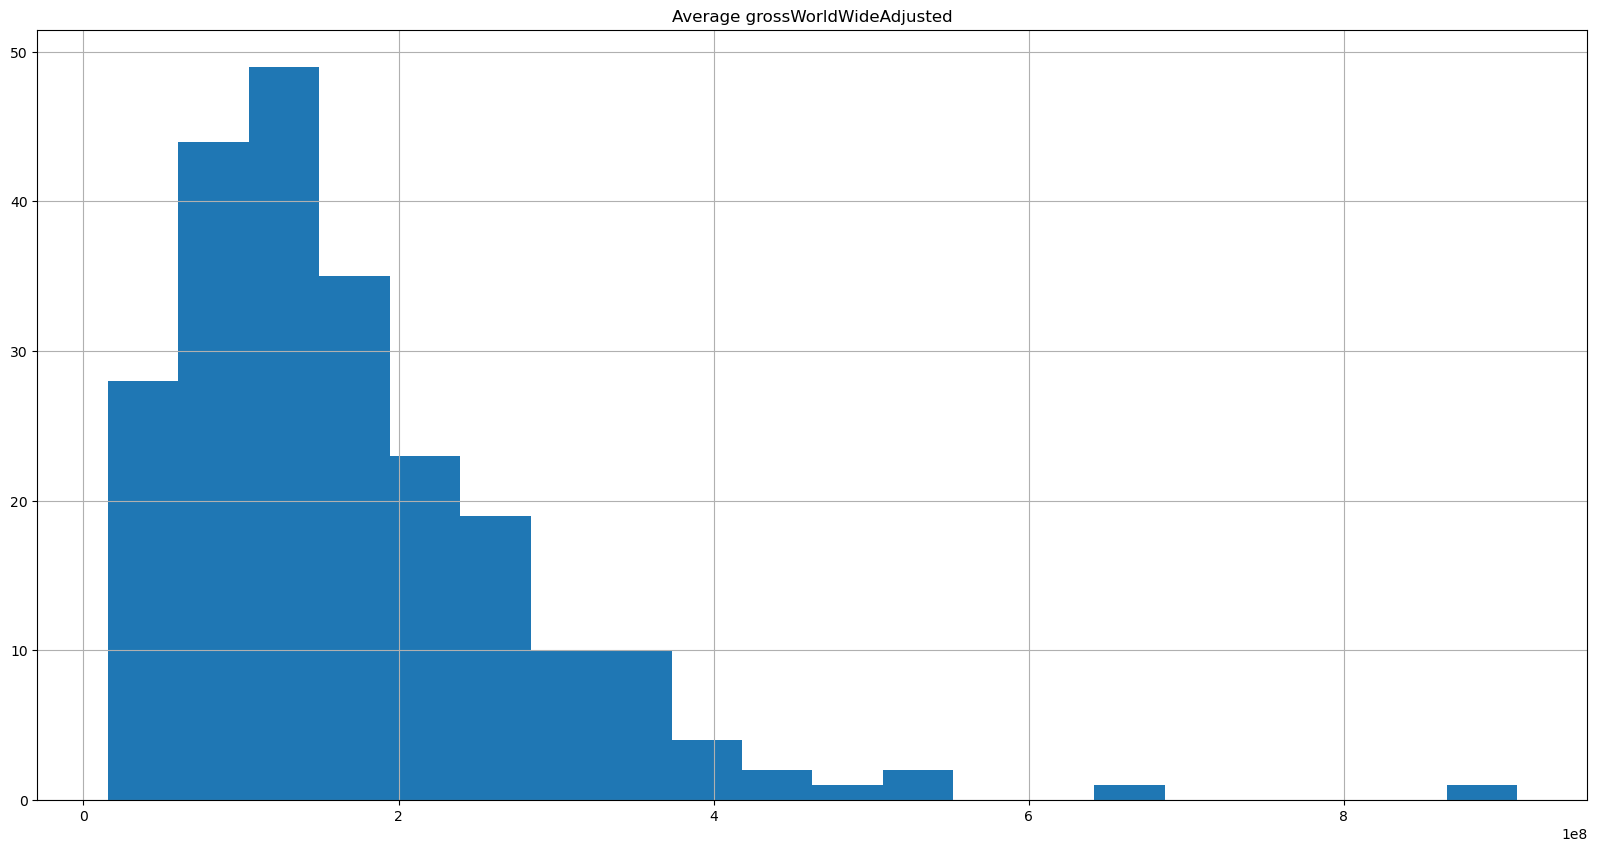

In [47]:
# Display the histogram by average gross worldwide adjusted for actors
by_actors_df.hist(column='Average grossWorldWideAdjusted', bins=20, figsize=(20, 10))

In [48]:
# Look up all the movies of an actor
highest_grossing_actor_movies_df = actors_expanded_df.loc[actors_expanded_df['stars'] == 'Harrison Ford']
highest_grossing_actor_movies_df.sort_values('Year', ascending=False, inplace=True)
highest_grossing_actor_movies_df.reset_index(drop=True, inplace=True)
highest_grossing_actor_movies_df

C:\Users\hunte\AppData\Local\Temp\ipykernel_2512\1127831635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_grossing_actor_movies_df.sort_values('Year', ascending=False, inplace=True)


,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
0,Indiana Jones and the Dial of Destiny,2023,PG-13,6.5,214K,387200000.0,383963057.0,174480468.0,60368101.0,['James Mangold'],Harrison Ford,0,35,1,0.991640,3.839631e+08
1,Ender's Game,2013,PG-13,6.6,258K,110000000.0,125544024.0,61737191.0,27017351.0,['Gavin Hood'],Harrison Ford,0,6,0,1.141309,1.629397e+08
2,42,2013,PG-13,7.5,105K,40000000.0,97510197.0,95059709.0,27487144.0,['Brian Helgeland'],Harrison Ford,0,21,0,2.437755,1.265555e+08
3,Extraordinary Measures,2010,PG,6.4,18K,31000000.0,15134293.0,12068313.0,6012594.0,['Tom Vaughan'],Harrison Ford,0,0,0,0.488203,2.098219e+07
4,Morning Glory,2010,PG-13,6.5,85K,40000000.0,60040976.0,31011732.0,9203266.0,['Roger Michell'],Harrison Ford,0,3,0,1.501024,8.324082e+07
5,Crossing Over,2009,R,6.7,25K,19000000.0,3676533.0,455654.0,77370.0,['Wayne Kramer'],Harrison Ford,0,0,0,0.193502,5.180564e+06
6,Indiana Jones and the Kingdom of the Crystal ...,2008,PG-13,6.2,499K,185000000.0,786636033.0,317101119.0,100137835.0,['Steven Spielberg'],Harrison Ford,0,42,1,4.252087,1.104890e+09
7,Hollywood Homicide,2003,PG-13,5.3,40K,75000000.0,51142659.0,30940691.0,11112632.0,['Ron Shelton'],Harrison Ford,0,0,0,0.681902,8.403540e+07
8,What Lies Beneath,2000,PG-13,6.6,139K,100000000.0,291420351.0,155464351.0,29702959.0,['Robert Zemeckis'],Harrison Ford,0,7,0,2.914204,5.116872e+08
9,Six Days Seven Nights,1998,PG-13,5.9,85K,70000000.0,164839294.0,74339294.0,16485276.0,['Ivan Reitman'],Harrison Ford,0,5,0,2.354847,3.057368e+08


In [49]:
by_actors_df[['stars', 'Average grossWorldWideAdjusted']].head(10)

,stars,Average grossWorldWideAdjusted
23,Chris Evans,9.099628e+08
2,Harrison Ford,6.430275e+08
42,Will Smith,5.348986e+08
125,Mark Ruffalo,5.131602e+08
11,Tom Cruise,4.888039e+08
130,Robert Downey Jr.,4.423327e+08
81,Tim Allen,4.187681e+08
161,Tobey Maguire,4.126313e+08
21,Cameron Diaz,4.003180e+08
29,Tom Hanks,3.960076e+08


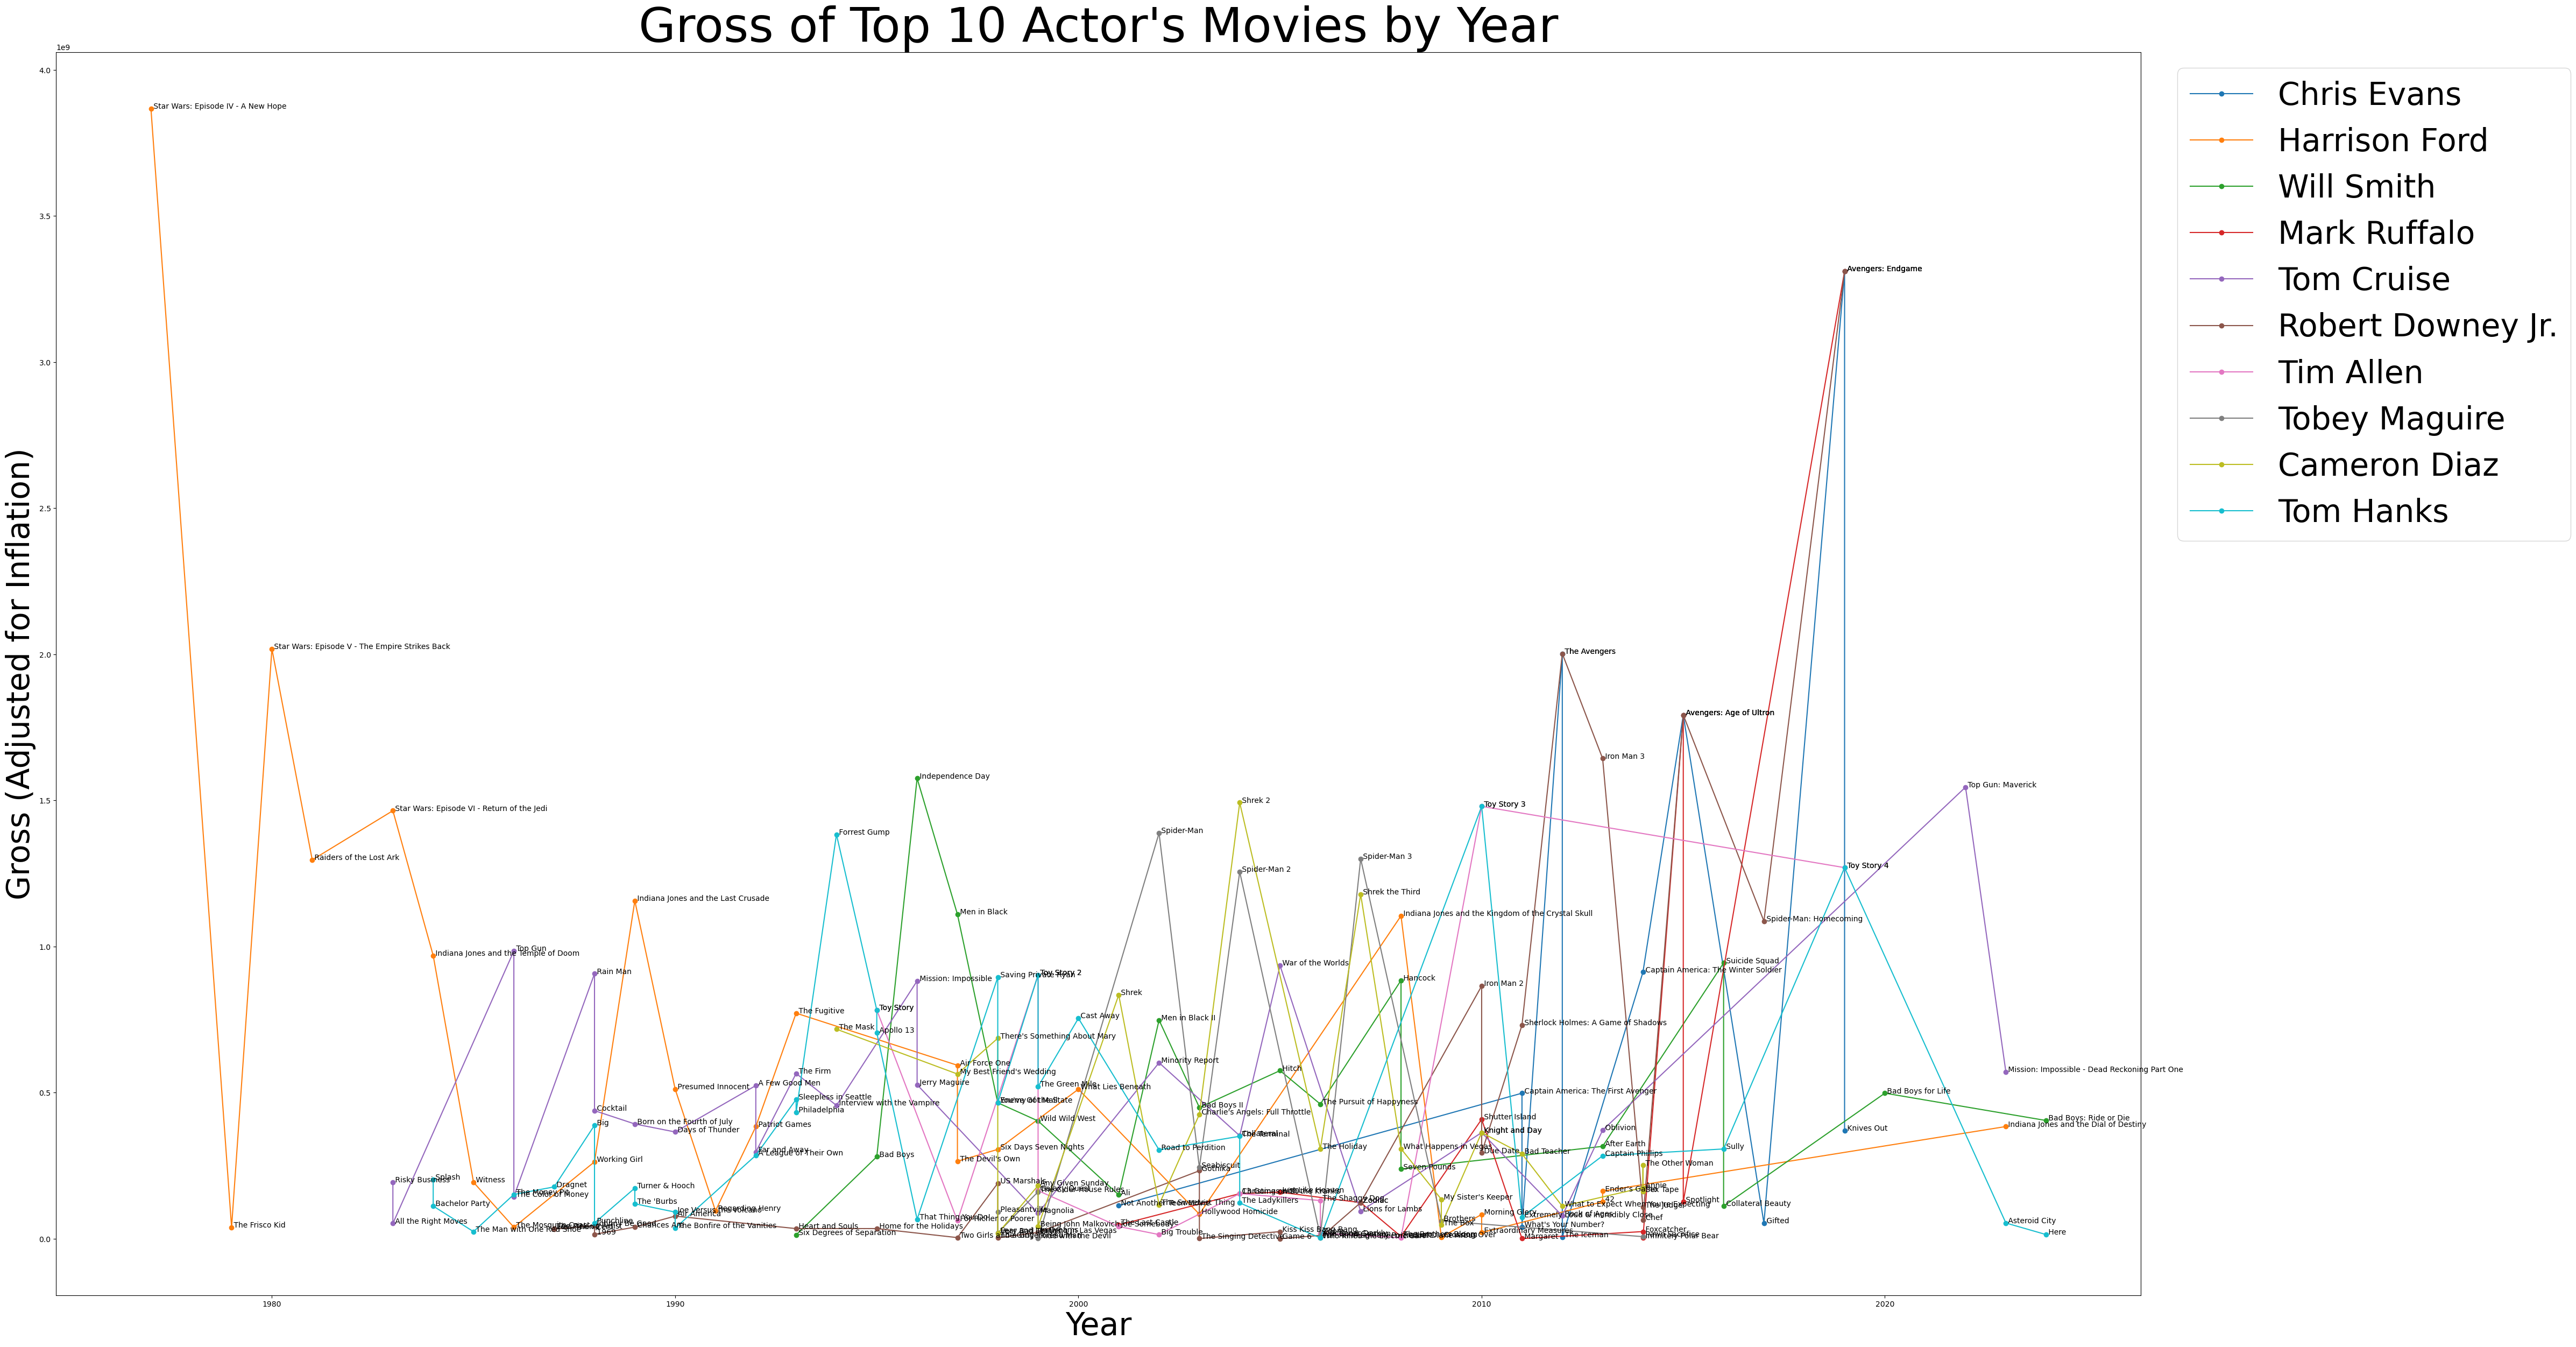

In [50]:
# plot a line chart of the average gross worldwide adjusted for each actor by movies over time
plt.figure(figsize=(50, 30))
for actor in by_actors_df['stars'].iloc[:10].unique():
    current_actor = actors_expanded_df.loc[actors_expanded_df['stars'] == actor]
    plt.plot(current_actor['Year'], current_actor['grossWorldWideAdjusted'], 'o-')
    for i in range(len(current_actor)):
        plt.text(current_actor['Year'].iloc[i], current_actor['grossWorldWideAdjusted'].iloc[i], current_actor['Title'].iloc[i])
plt.xlabel('Year', fontsize=42)
plt.ylabel('Gross (Adjusted for Inflation)', fontsize=42)
plt.title("Gross of Top 10 Actor's Movies by Year", fontsize=64)
plt.legend(by_actors_df['stars'].iloc[:10].unique(), bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize=42)
# Label each point on the graph by the movie name
plt.size=(100, 50)

plt.show()

### Observations (similar to directors)
* Actors often trend at a given time. Chris Evans increased over time, while Harrison Ford decreased
* There are a lot of peaks that raise the actors average but shows that they do have movies that make a lot less. High success isn't guaranteed by an actor, but even their lower performing movies for these top 10 actors are higher than the upper quartile range for overall gross world wide earnings.
* Different from directors, some of the actors starred in the same movies like Avengers. Were these such high grossing movies in part because there were several succesfful actors or were the actors so successful because they were in these movies? I don't think the analysis clearly answers that.

### Conclusion
#### Movies from a particular director aren't guaranteed to be successful, but they are more likely to be succesful with some of the top actor. Actors are rated by profitablity ratio do differ from hihghest grossing, showing that actors working with a smaller budget can multiply that in earnings more than actors that have higher budgets.

### Future work
#### Further analysis could account better for the success of a actor during a given time rather than average overall time. Try including other measures of success, like IMDb rating, oscars, or different datasets to distinguish more between actors that star in the same movies.

# Compare to Overall Movies Hist

In [51]:
df.sort_values(by='grossWorldWideAdjusted', ascending=False, inplace=True)
df.head(10)

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
35,Star Wars: Episode IV - A New Hope,1977,PG,8.6,1.5M,11000000.0,7.753985e+08,460998507.0,1554475.0,['George Lucas'],"['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']",0,30,0,70.490773,3.867495e+09
3996,Avengers: Endgame,2019,PG-13,8.4,1.3M,356000000.0,2.799439e+09,858373000.0,357115007.0,"['Anthony Russo', 'Joe Russo']","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",0,133,1,7.863593,3.310695e+09
27,The Exorcist,1973,R,8.1,470K,11000000.0,4.308728e+08,233005644.0,8175666.0,['William Friedkin'],"['Ellen Burstyn', 'Max von Sydow', 'Linda Blair']",0,21,0,39.170252,2.932368e+09
31,Jaws,1975,PG,8.1,683K,7000000.0,4.772206e+08,266567580.0,7061513.0,['Steven Spielberg'],"['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...",0,20,0,68.174369,2.680599e+09
136,ET the Extra-Terrestrial,1982,PG,7.9,448K,10500000.0,7.973074e+08,439454989.0,11835389.0,['Steven Spielberg'],"['Henry Thomas', 'Drew Barrymore', 'Peter Coyo...",0,38,0,75.934039,2.497154e+09
4120,Avatar: The Way of Water,2022,PG-13,7.5,521K,350000000.0,2.320250e+09,684075767.0,134100226.0,['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0,152,0,6.629287,2.397390e+09
1072,Jurassic Park,1993,PG-13,8.2,1.1M,63000000.0,1.104380e+09,407185075.0,47026828.0,['Steven Spielberg'],"['Sam Neill', 'Laura Dern', 'Jeff Goldblum']",0,27,0,17.529840,2.311121e+09
1,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,2.158800e+08,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0,53.970003,2.182800e+09
4083,Spider-Man: No Way Home,2021,PG-13,8.2,926K,200000000.0,1.952724e+09,814866759.0,260138569.0,['Jon Watts'],"['Tom Holland', 'Zendaya', 'Benedict Cumberbat...",0,71,1,9.763619,2.178784e+09
66,Star Wars: Episode V - The Empire Strikes Back,1980,PG,8.7,1.4M,18000000.0,5.500161e+08,292753960.0,4910483.0,['Irvin Kershner'],"['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']",0,20,0,30.556449,2.018519e+09


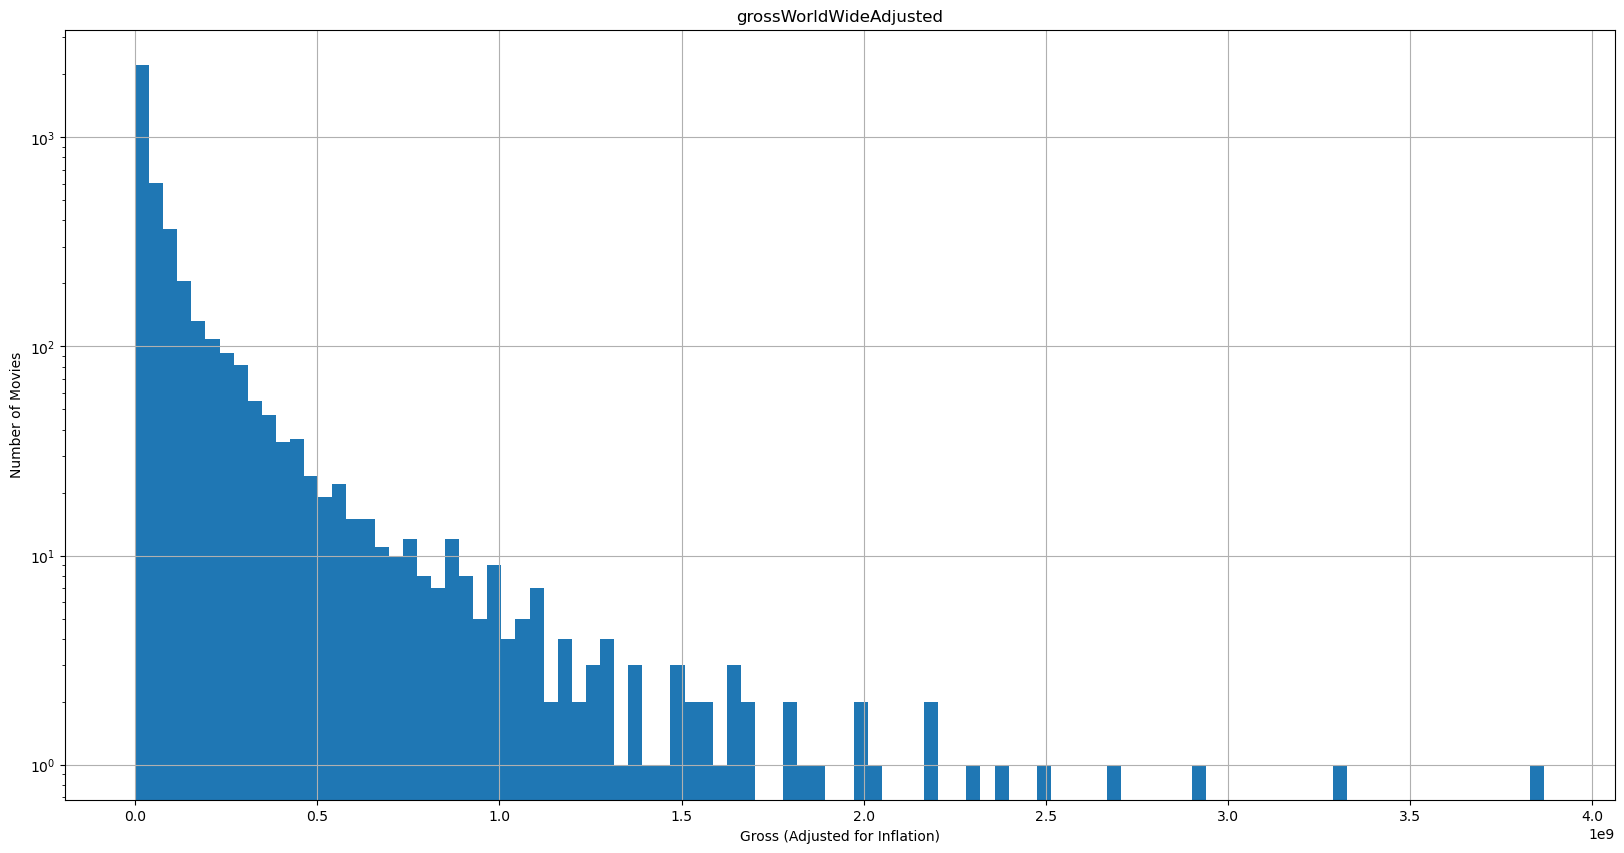

In [52]:
gross_hist = df.hist(column='grossWorldWideAdjusted', bins=100, figsize=(20, 10), log=True)
for ax in gross_hist.flatten():
    ax.set_xlabel('Gross (Adjusted for Inflation)')
    ax.set_ylabel('Number of Movies')

In [53]:
df.grossWorldWideAdjusted.describe()

count    4.223000e+03
mean     1.181593e+08
std      2.490418e+08
min      5.819861e+02
25%      4.479696e+06
50%      3.408609e+07
75%      1.130530e+08
max      3.867495e+09
Name: grossWorldWideAdjusted, dtype: float64

## Issues with the analysis
* Data cleaning could definitely be improved, much of it due to issues with the original data. I would like to look into different data sources as well like the IMDb API
* There are a lot of influnces to movie succes that were not accounted for in this data like the impact of Covid19 on the box office so there are limitations with the data.
* I would like to look at additonal statistical testing that could be done to better support a correlation